## Airbnb Case Study - Storytelling 
### Upgrad & IIITB | DS C57 | BA Track | Submitted by Rajeev Punjabi

# 1. Importing libraries and reading the data

In [1]:
# Let us import the necessary python libraries :

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os,sys
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the Data :
df = pd.read_csv('Data File_AB_NYC_2019.csv')

In [3]:
# Checking the DataFrame :
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Checking the Data Types included :
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Checked for the numerical and categorical variables
As we can see that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a particular area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category.

While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are numerical variables

There are various types of numerical as well as categorical columns here , hence they can be used further for our analysis

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Checking the shape of the dataframe : 
df.shape

(48895, 16)

In [8]:
no_of_hosts= df['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings= df['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11452
The total no of listings in NYC: 47896


<div class="alert alert-block alert-info">
<b>Inference:</b> It is thus observed that we have a dataset with 48895 rows and 16 columns
</div>

In [9]:
# Checking for the null values in the columns : 
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# We can replace the nulls in review_per_month with a 0 for better understanding :
df.fillna({'reviews_per_month':0},inplace= True)
df['reviews_per_month'].isna().sum()

0

# 2. Creating categories from existing features

### 2.1 Categorizing the "availability_365" column into 5 categories

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [12]:
def availability_365_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'Very High'

In [13]:
df['availability_365_categories'] = df.availability_365.map(availability_365_categories_function)
df['availability_365_categories']

0        Very High
1        Very High
2        Very High
3           Medium
4         Very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

In [14]:
df['availability_365_categories'].value_counts()

availability_365_categories
Very Low     17941
Low          11829
Very High     8108
Medium        5792
High          5225
Name: count, dtype: int64

### 2.2 Categorizing the "minimum_nights" column into 5 categories

In [15]:
def minimum_night_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 3:
        return 'Low'
    elif row <= 5 :
        return 'Medium'
    elif (row <= 7):
        return 'High'
    else:
        return 'Very High'

In [16]:
# testing the function
print(minimum_night_categories_function(7))
print(minimum_night_categories_function(1))
print(minimum_night_categories_function(0))
print(minimum_night_categories_function(-1))

High
Very Low
Very Low
Very Low


In [17]:
df['minimum_night_categories'] = df.minimum_nights.map(minimum_night_categories_function)
df['minimum_night_categories']

0         Very Low
1         Very Low
2              Low
3         Very Low
4        Very High
           ...    
48890          Low
48891       Medium
48892    Very High
48893     Very Low
48894         High
Name: minimum_night_categories, Length: 48895, dtype: object

In [18]:
df.minimum_night_categories.value_counts()

minimum_night_categories
Low          19695
Very Low     12720
Very High     7333
Medium        6337
High          2810
Name: count, dtype: int64

### 2.3 Categorizing the "number_of_reviews" column into 5 categories

In [19]:
def number_of_reviews_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 5:
        return 'Low'
    elif row <= 10 :
        return 'Medium'
    elif (row <= 30):
        return 'High'
    else:
        return 'Very High'

In [20]:
df['number_of_reviews_categories'] = df.minimum_nights.map(number_of_reviews_categories_function)
df['number_of_reviews_categories']

0        Very Low
1        Very Low
2             Low
3        Very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    Very Low
48894      Medium
Name: number_of_reviews_categories, Length: 48895, dtype: object

### 2.4 Categorizing the "price" column into 5 categories

In [21]:
len(df[df['price']==0]) #Property/listings which have '0' price listed.

11

In [22]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


In [23]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: >

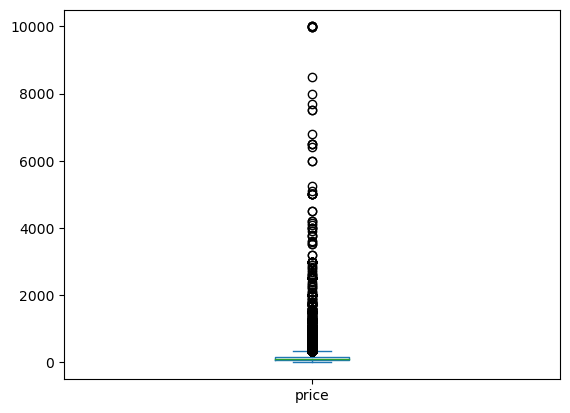

In [24]:
df.price.plot.box()

In [25]:
df[df.price == 0].shape

(11, 19)

In [26]:
def price_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'Very Low'
    elif row <= 4:
        return 'Low'
    elif row <= 15 :
        return 'Medium'
    elif (row <= 100):
        return 'High'
    else:
        return 'Very High'

In [27]:
df['price_categories'] = df.minimum_nights.map(price_categories_function)
df['price_categories']

0        Very Low
1        Very Low
2             Low
3        Very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    Very Low
48894      Medium
Name: price_categories, Length: 48895, dtype: object

# 3. Fixing columns

In [28]:
# To see Non-Null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<div class="alert alert-block alert-info">
<b>Inference:</b> reviews_per_month is of object Dtype. datetime64 is a better Dtype for this column.
</div>

In [29]:
df.last_review = pd.to_datetime(df.last_review)
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>Inference:</b> There are no more Dtypes to be fixed and data does not contain inconsistencies such as shifted columns, which is need to align correctly.The columns necessery for the futher analysis are also derived.
</div>

# 4. Data types - Categorical and Numerical

### 4.1 Categorical columns

In [31]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

In [32]:
# Categorical nominal
categorical_columns = df.columns[[0,1,3,4,5,8,16,17,18,19]]
categorical_columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'availability_365_categories', 'minimum_night_categories',
       'number_of_reviews_categories', 'price_categories'],
      dtype='object')

In [33]:
# To see the first few rows of categorical columns
df[categorical_columns].head()

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,Very Low,Very High,Medium,Medium


### 4.2 Numerical columns

In [34]:
numerical_columns = df.columns[[9,10,11,13,14,15]]
numerical_columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [35]:
df[numerical_columns].head()   

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,0.00,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [36]:
df[numerical_columns].describe() 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 4.3 Coordinates and Last review dates

In [37]:
coordinates = df.columns[[5,6,12]]
df[coordinates]

,neighbourhood,latitude,last_review
0,Kensington,40.64749,2018-10-19
1,Midtown,40.75362,2019-05-21
2,Harlem,40.80902,NaT
3,Clinton Hill,40.68514,2019-07-05
4,East Harlem,40.79851,2018-11-19
...,...,...,...
48890,Bedford-Stuyvesant,40.67853,NaT
48891,Bushwick,40.70184,NaT
48892,Harlem,40.81475,NaT
48893,Hell's Kitchen,40.75751,NaT


# 5. Handling missing values

In [38]:
# To see the number of missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
availability_365_categories           0
minimum_night_categories              0
number_of_reviews_categories          0
price_categories                      0
dtype: int64

In [39]:
# Percentage of missing values
round((df.isnull().sum()/len(df))*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
availability_365_categories        0.00
minimum_night_categories           0.00
number_of_reviews_categories       0.00
price_categories                   0.00
dtype: float64

<div class="alert alert-block alert-info">
<b>Inferences:</b> One column  (last_review) has around 20.56% of missing value. Two more columns: name and host_name have 0.3% and 0.4 % missing values respectively.

We need to see if the values are Missing completely at random (MCAR). 
The reason behind the missing value is not dependent on any other features or if it is "missing not at random" (MNAR). There is a specific reason behind the missing value.

There is no dropping or imputation of columns as we are just analyzing the dataset and not making a model. Also most of the features are important for our analysis.
</div>

### 5.1 Missing Values Analysis

In [40]:
# Selecting the data with missing values for 'last_review' feature
df1 = df.loc[df.last_review.isnull(),:]
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.0,1,365,Very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,0.0,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,0.0,1,0,Very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,0.0,1,365,Very High,Very High,Very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,0.0,1,365,Very High,Very Low,Very Low,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.0,2,9,Low,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.0,2,36,Low,Medium,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.0,1,27,Low,Very High,Medium,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.0,6,2,Low,Very Low,Very Low,Very Low


### 5.2 Missing Values Analysis for 'neighbourhood_group' feature

In [41]:
# Count of 'neighbourhood_group' with missing values
df1.groupby('neighbourhood_group').neighbourhood_group.count().sort_values(ascending = False)

neighbourhood_group
Manhattan        5029
Brooklyn         3657
Queens           1092
Bronx             215
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [42]:
# Count of 'neighbourhood_group'
df.groupby('neighbourhood_group').neighbourhood_group.count().sort_values(ascending = False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [43]:
((df1.groupby('neighbourhood_group').neighbourhood_group.count()/df.groupby('neighbourhood_group').neighbourhood_group.count())*100).sort_values(ascending = False)

neighbourhood_group
Manhattan        23.216841
Bronx            19.706691
Queens           19.272856
Brooklyn         18.190410
Staten Island    15.817694
Name: neighbourhood_group, dtype: float64

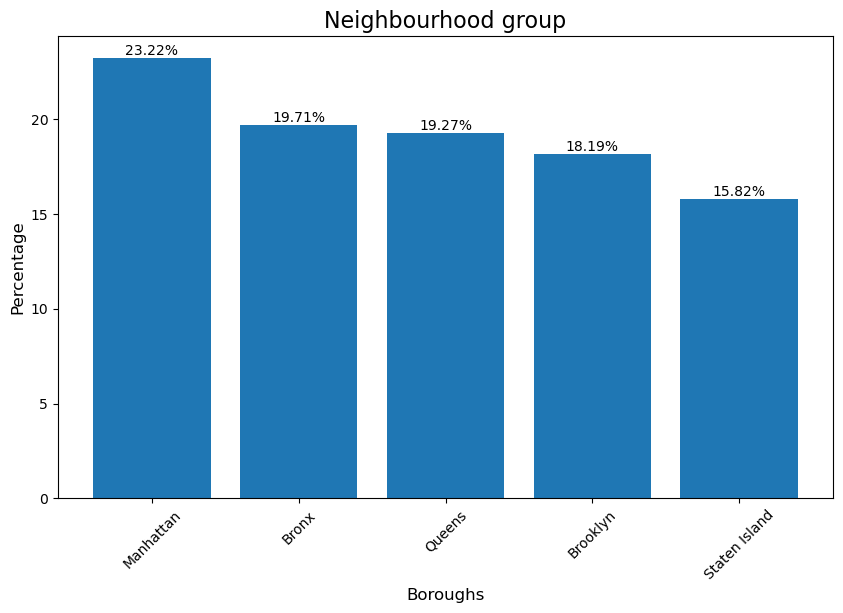

In [44]:
# Calculate the percentage and store it in a DataFrame
percentage_df = ((df1.groupby('neighbourhood_group').neighbourhood_group.count() / df.groupby('neighbourhood_group').neighbourhood_group.count()) * 100).reset_index(name='percentage')

# Sort the DataFrame by the percentage column in descending order
percentage_df_sorted = percentage_df.sort_values(by='percentage', ascending=False)

# Plot the sorted data and add data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_df_sorted['neighbourhood_group'], percentage_df_sorted['percentage'])
plt.title('Neighbourhood group', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Boroughs', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom')

plt.show()

In [45]:
((df1.groupby('neighbourhood_group').neighbourhood_group.count()/df.groupby('neighbourhood_group').neighbourhood_group.count())*100).mean()

19.240898461107257

<div class="alert alert-block alert-info">
<b>Inference:</b> Each "neighbourhood_group" has about 19 % missing values in 'last_review' feature.
</div>

In [46]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.0,1,365,Very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,0.0,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,0.0,1,0,Very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,0.0,1,365,Very High,Very High,Very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,0.0,1,365,Very High,Very Low,Very Low,Very Low


### 5.3 Missing values Analysis for 'room_type' feature

In [47]:
# Count of 'room_type' with missing values
df2 = (df1.groupby('room_type').room_type.count()/df.groupby('room_type').room_type.count())*100
df2

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

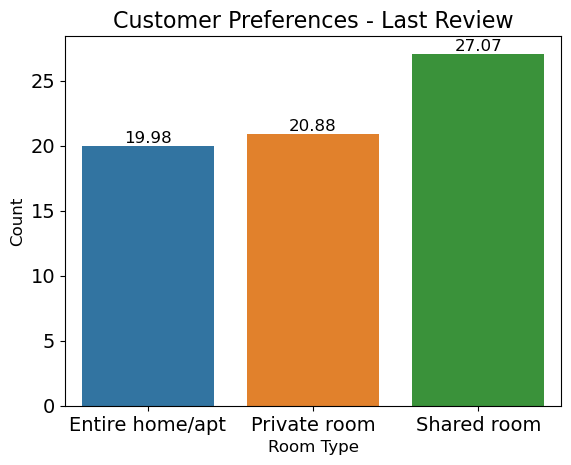

In [48]:
plt.title('Customer Preferences - Last Review', fontsize=16)
plt.rcParams["figure.figsize"] = [7.5, 3.5]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x=df2.index, y=df2.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Room Type', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add data labels with two decimal places
for index, value in enumerate(df2.values):
    plt.text(index, value, '{:.2f}'.format(value), ha='center', va='bottom', fontsize=12)

plt.show()

<div class="alert alert-block alert-info">
<b>Inference:</b> 'Shared room' has the highest missing value percentage (27%) for 'last_review' feature while to other room types has only about 20%.
</div>

In [49]:
print('Mean and Median of prices with last_review feature missing')
print('Mean   = ', df[df['last_review'].isnull()].price.mean())
print('Median = ', df[df['last_review'].isnull()].price.median())

print('\nMean and Median of prices with last_review feature not missing')
print('Mean   = ', df[df['last_review'].notnull()].price.mean())
print('Median = ', df[df['last_review'].notnull()].price.median())

Mean and Median of prices with last_review feature missing
Mean   =  192.9190210903303
Median =  120.0

Mean and Median of prices with last_review feature not missing
Mean   =  142.317946605566
Median =  101.0


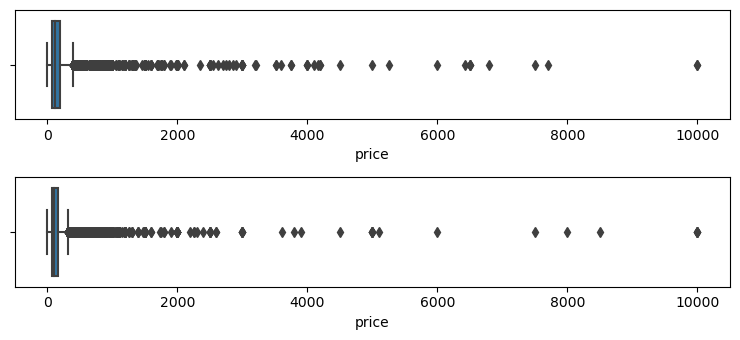

In [50]:
# plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
sns.boxplot(data = df[df['last_review'].isnull()] , x = 'price',  width= .8)

plt.subplot(2,1,2)
sns.boxplot(data = df[df['last_review'].notnull()] , x = 'price',  width= .8)

plt.show()

<div class="alert alert-block alert-info">
<b>Inferences:</b> The pricing is higher when 'last_review' feature is missing. Reviews are less likely to be given for shared rooms. When the prices are high reviews are less likely to be given. The above analysis seems to show that the missing values here are not MCAR (missing completely at random)
</div>

# 6. Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Neighbourhood groups')

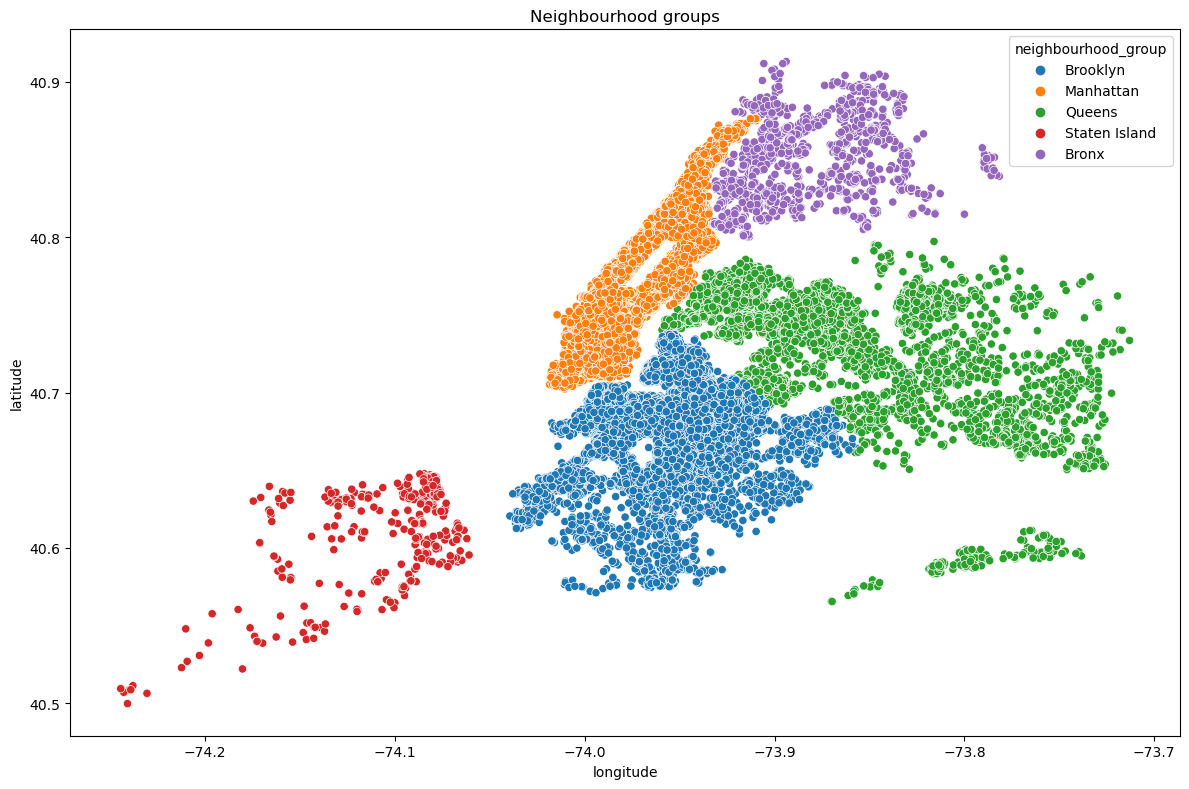

In [51]:
# Lets check the overall map spread of airbnb :

plt.figure(figsize=(12,8))
ax=sns.scatterplot(data=df, x="longitude", y="latitude", hue="neighbourhood_group");
ax.set_title('Neighbourhood groups')

### 6.1 Room type wise distribution across New York City

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

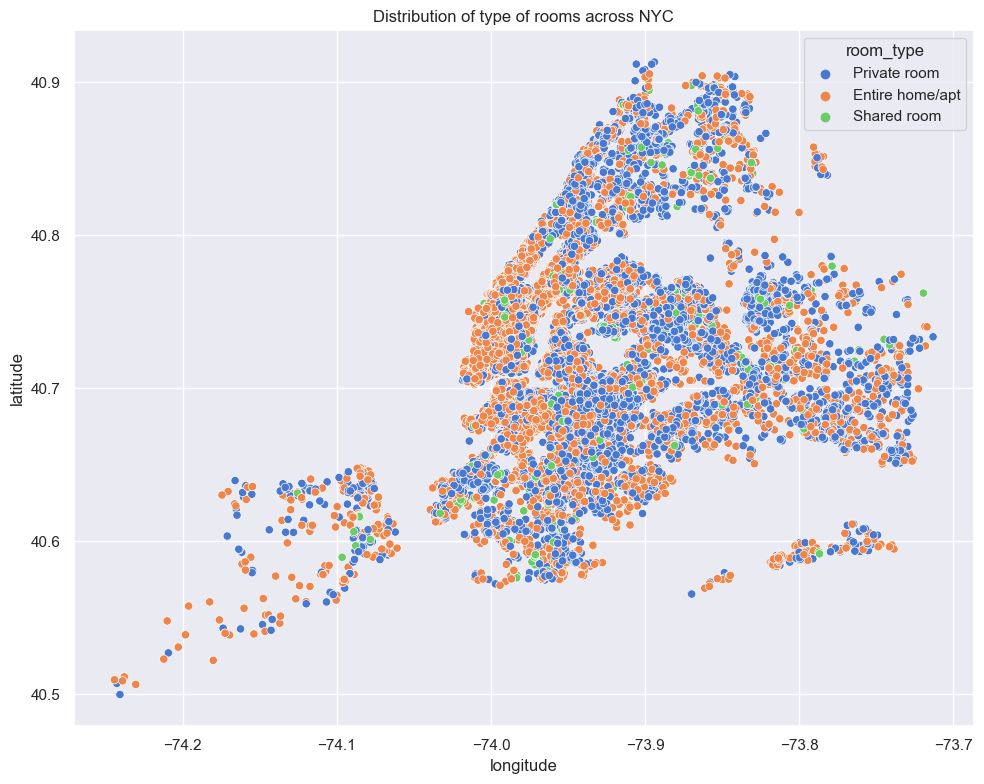

In [52]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

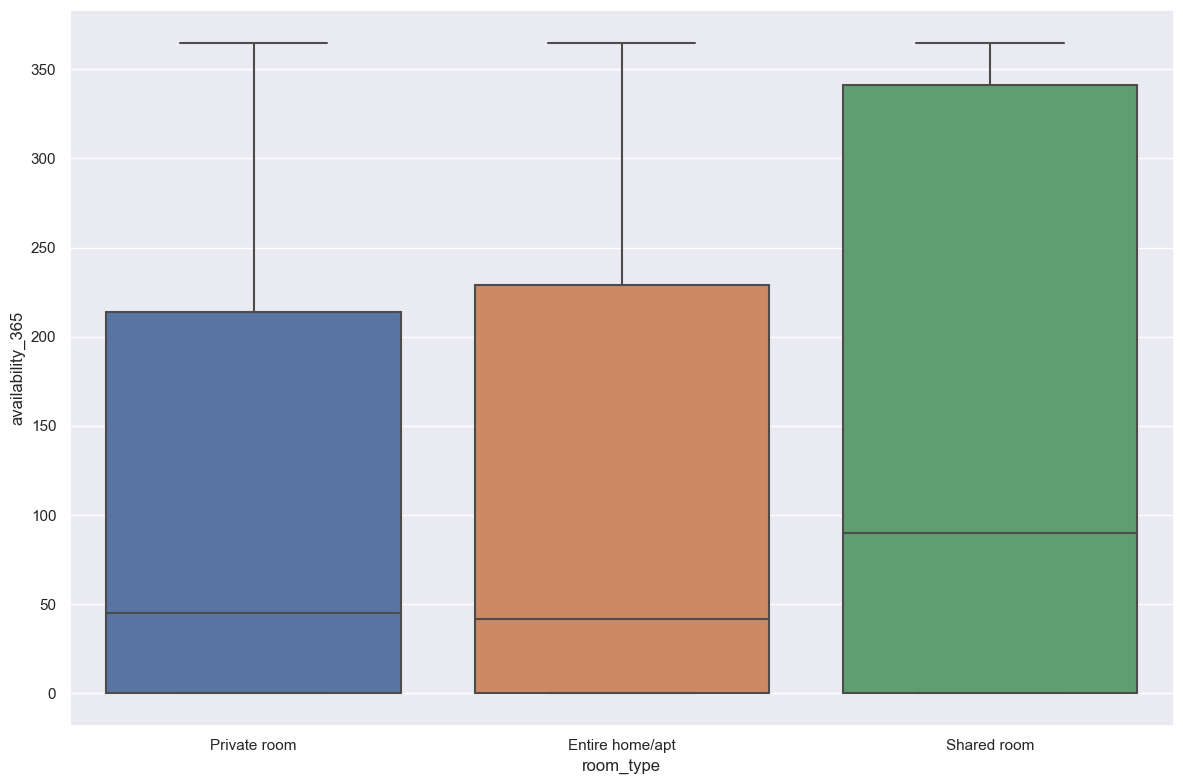

In [53]:
#Checking availability of room vs room type :
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='room_type',y='availability_365');

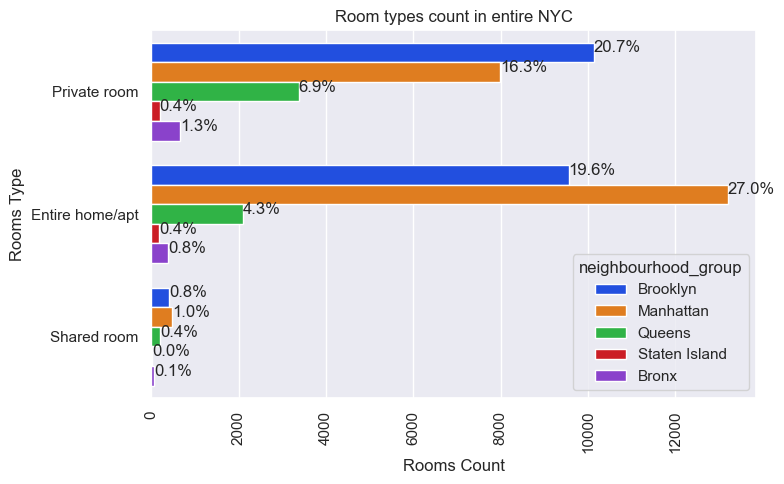

In [54]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Room types count in entire NYC')
plt.xlabel('Rooms Count')
plt.xticks(rotation=90)
plt.ylabel('Rooms Type')

plt.show()

<div class="alert alert-block alert-info">
<b>Inferences:</b> Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%. Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens. Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx. We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.
</div>

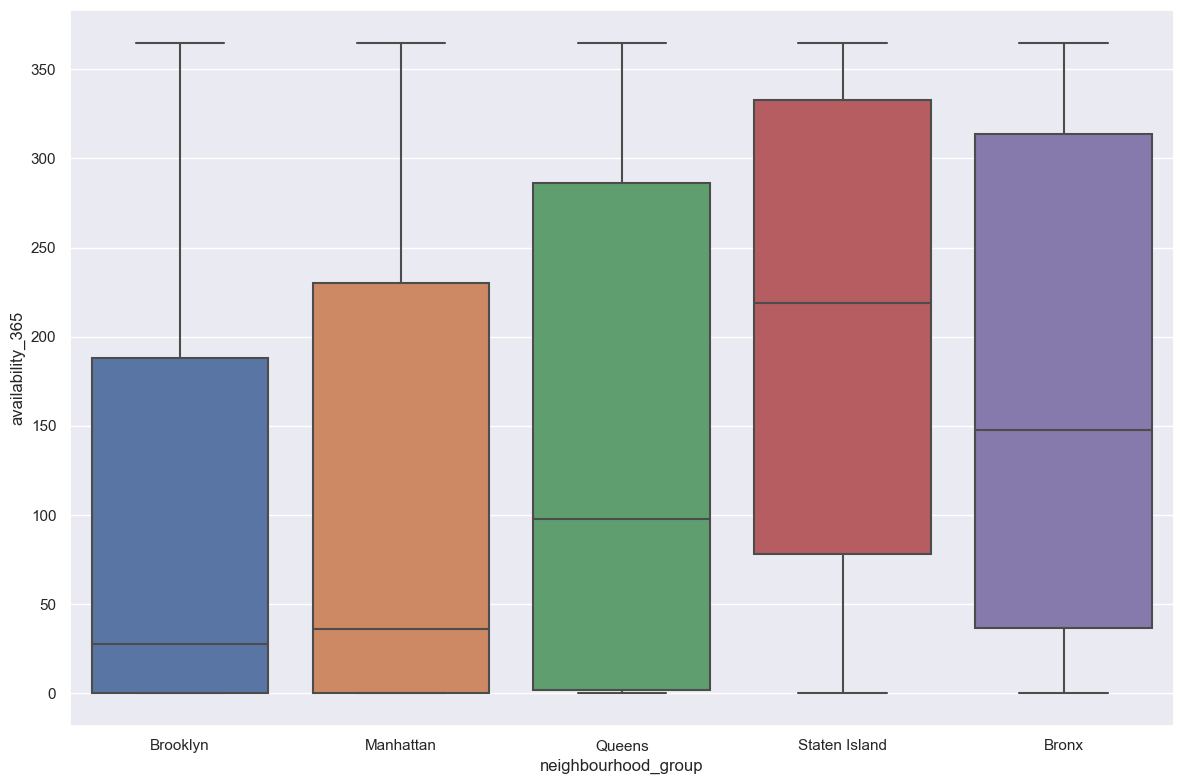

In [55]:
#Checking availability of room vs neighbourhood group :

plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='neighbourhood_group',y='availability_365');

### 6.2 Distribution of the listings with availability!¶


<Axes: xlabel='availability_365', ylabel='Density'>

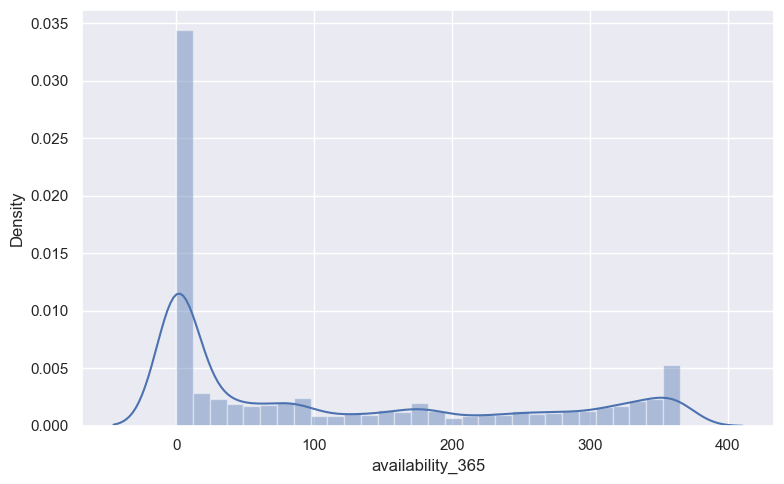

In [56]:
#distribution of listings availability at NYC!
sns.distplot(df['availability_365'])

<div class="alert alert-block alert-info">
<b>Inferences:</b> availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:
</div>

In [57]:
#skewness and kurtosis
print("Skewness: %f" % df['availability_365'].skew())
print("Kurtosis: %f" % df['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


### 6.3 Reviews/month distribution as per listings in NYC



<Axes: ylabel='Frequency'>

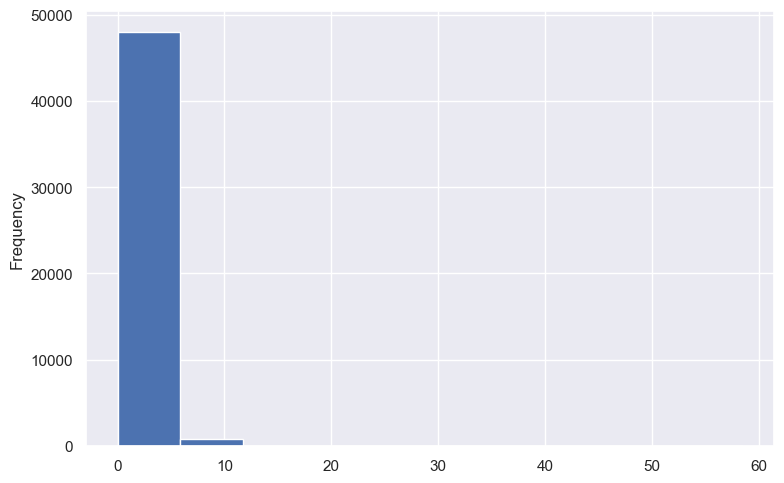

In [58]:
df['reviews_per_month'].plot.hist()

<Axes: xlabel='reviews_per_month', ylabel='Density'>

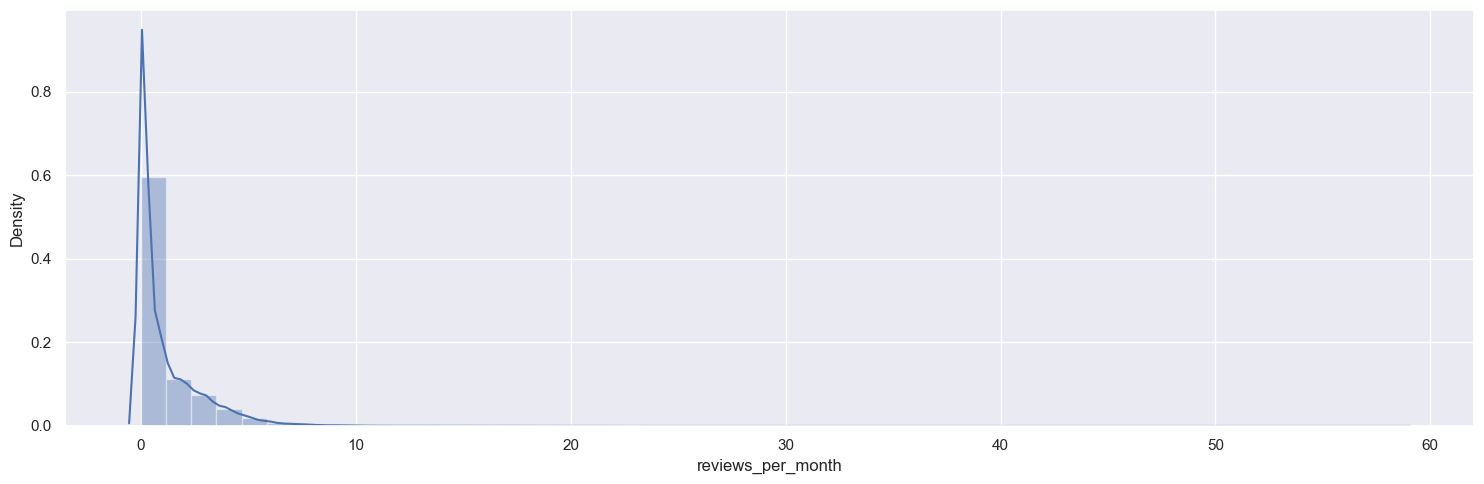

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['reviews_per_month'])

<div class="alert alert-block alert-info">
<b>Inferences:</b> Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.
</div>

In [60]:
#skewness and kurtosis
print("Skewness: %f" % df['reviews_per_month'].skew())
print("Kurtosis: %f" % df['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large amount of outliers.

Skewness: 3.300723
Kurtosis: 43.531611


# 7. Univariate Analysis

### 7.1 Handling the outliers

<Axes: >

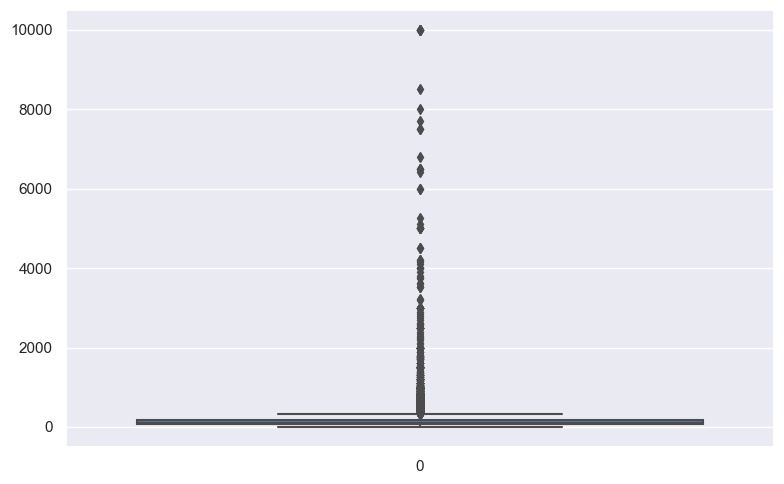

In [61]:
# Checking for outliers in price column
sns.boxplot(df['price'])

In [62]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.090910,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.597283,32.952519,131.622289


### 7.2 Using quantile approach to remove outliers

In [63]:
min_threshold,max_threshold= df.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [64]:
df[df.price<min_threshold] #prices less than min threshold!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226,High,Low,Low,Low
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.07,1,321,Very High,Low,Low,Low
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaT,0.00,4,137,Medium,Very High,High,High
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.53,3,50,Low,Low,Low,Low
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.22,3,258,High,Medium,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322,Very High,Very High,Medium,Medium
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaT,0.00,1,24,Low,Low,Low,Low
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaT,0.00,3,363,Very High,Very Low,Very Low,Very Low
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaT,0.00,6,338,Very High,Very Low,Very Low,Very Low


In [65]:
df[df.price>max_threshold] #similary for getting extreme price value above max_threshold

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaT,0.00,1,83,Low,Medium,Low,Low
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365,Very High,Very Low,Very Low,Very Low
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359,Very High,Very High,High,Medium
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaT,0.00,1,0,Very Low,Very Low,Very Low,Very Low
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaT,0.00,1,0,Very Low,Very Low,Very Low,Very Low
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaT,0.00,1,0,Very Low,Very Low,Very Low,Very Low
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,NaT,0.00,1,0,Very Low,Very Low,Very Low,Very Low
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363,Very High,High,Medium,Medium
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365,Very High,Very Low,Very Low,Very Low
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365,Very High,Very Low,Very Low,Very Low


In [66]:
df_pnw= df[(df.price>min_threshold)&(df.price<max_threshold)]

<Axes: xlabel='price', ylabel='Density'>

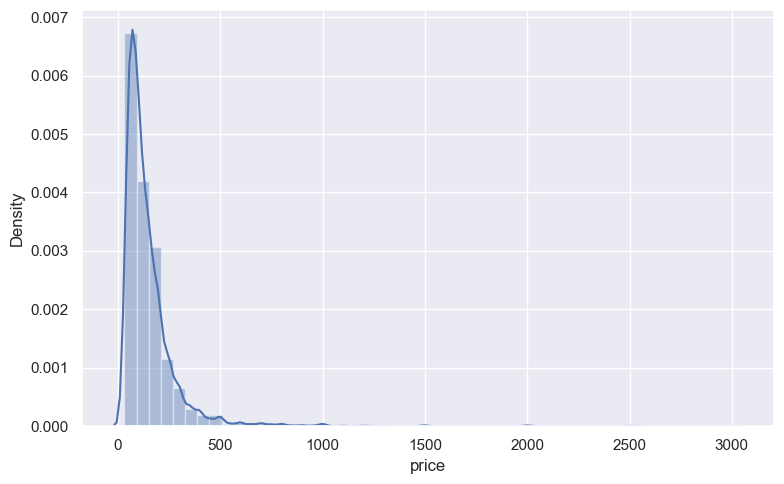

In [67]:
sns.distplot(df_pnw['price'])

<Axes: >

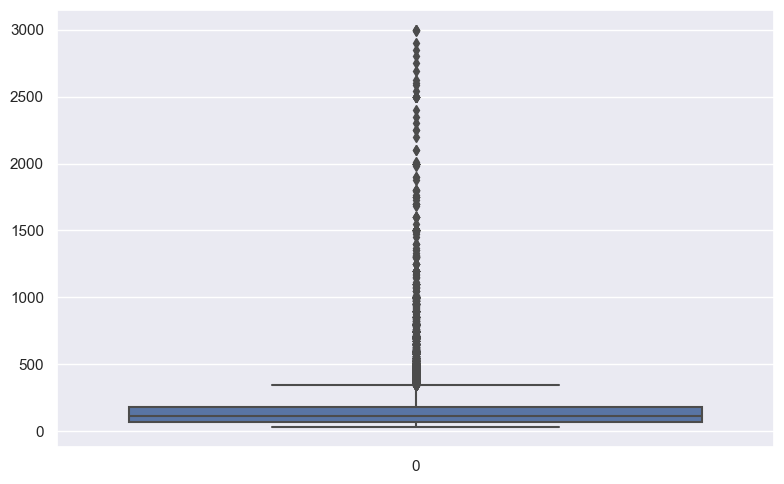

In [68]:
sns.boxplot(df_pnw['price']) #looks there are still many outliers!

In [69]:
#skewness and kurtosis
print("Skewness: %f" % df_pnw['price'].skew())
print("Kurtosis: %f" % df_pnw['price'].kurt())

Skewness: 6.378314
Kurtosis: 70.394436


### 7.3 Removing Outliers through Outlier treatment

In [70]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [71]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [72]:
df[(df.price < lower_bound) | (df.price > upper_bound)] #looking at the low and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180,Medium,Very High,Very High,Very High
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7,Low,Very Low,Very Low,Very Low
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243,High,Medium,Low,Low
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298,High,Low,Low,Low
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216,High,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaT,0.00,1,364,Very High,Low,Low,Low
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaT,0.00,1,64,Low,Low,Low,Low
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaT,0.00,1,23,Low,Very Low,Very Low,Very Low
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaT,0.00,1,9,Low,Very Low,Very Low,Very Low


In [73]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
df_pnw1 = df[(df.price>lower_bound) & (df.price<upper_bound)]

In [74]:
df_pnw1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9,Low,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36,Low,Medium,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27,Low,Very High,Medium,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2,Low,Very Low,Very Low,Very Low


<Axes: >

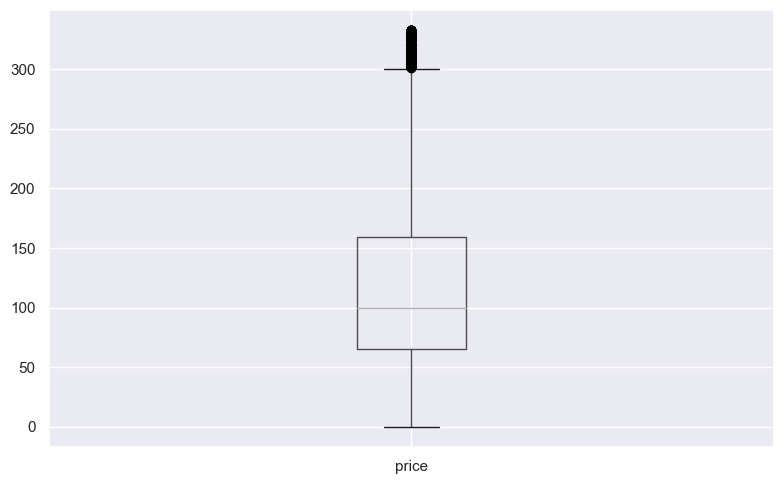

In [75]:
df_pnw1.boxplot(column='price') #the boxplot for price now looks good without outliers!

In [76]:
#skewness and kurtosis
print("Skewness: %f" % df_pnw1['price'].skew())
print("Kurtosis: %f" % df_pnw1['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


### 7.4 Distribution of the new price

<Axes: xlabel='price', ylabel='Density'>

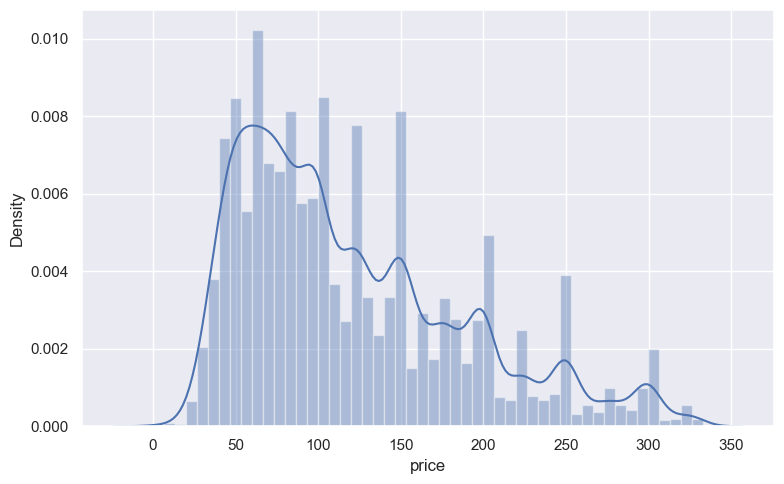

In [77]:
sns.distplot(df_pnw1['price'])

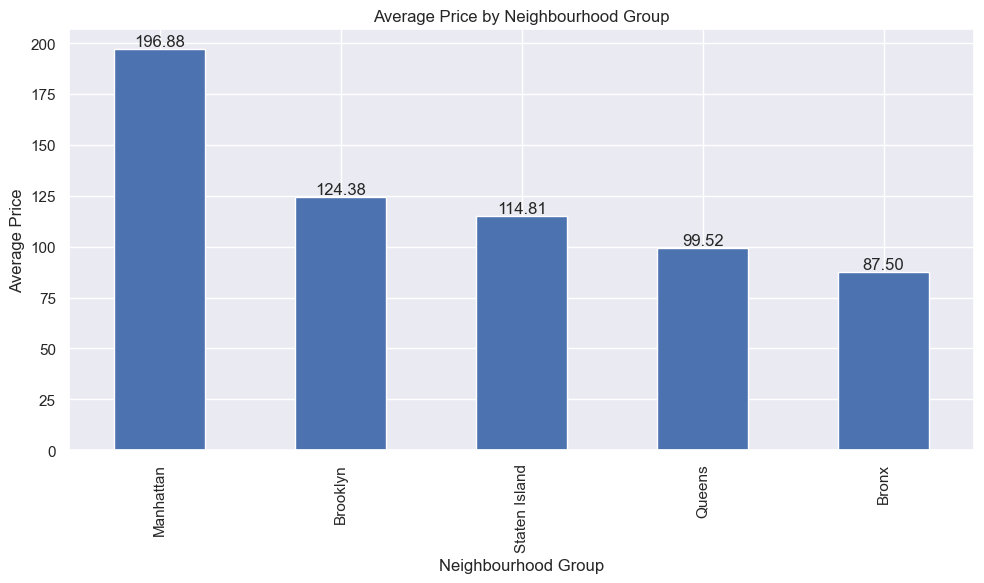

In [78]:
# Calculate the average price for each neighbourhood group
avg_price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_neighbourhood.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')

# Add data labels to the bars
for i, price in enumerate(avg_price_neighbourhood):
    plt.text(i, price, f'{price:.2f}', ha='center', va='bottom')

# Save the chart as an image file
plt.savefig('average_price_neighbourhood_sorted_with_labels.png')

# Display the chart
plt.show()



In [79]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


### 7.5 Univariate Analysis of  'name' feature

In [80]:
df.name.value_counts()

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47896, dtype: int64

### 7.6 Univariate Analysis of  'host_id' feature

In [81]:
df.host_id.value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

### 7.7 Univariate Analysis of  'host_name' feature

In [82]:
df.host_name.value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

In [83]:
df.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object', name='host_name')

In [84]:
df.host_name.value_counts().head(20)

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Mike            194
Andrew          190
Anna            187
Chris           182
Laura           182
Melissa         160
Emily           157
Jennifer        154
James           151
Rachel          146
Name: count, dtype: int64

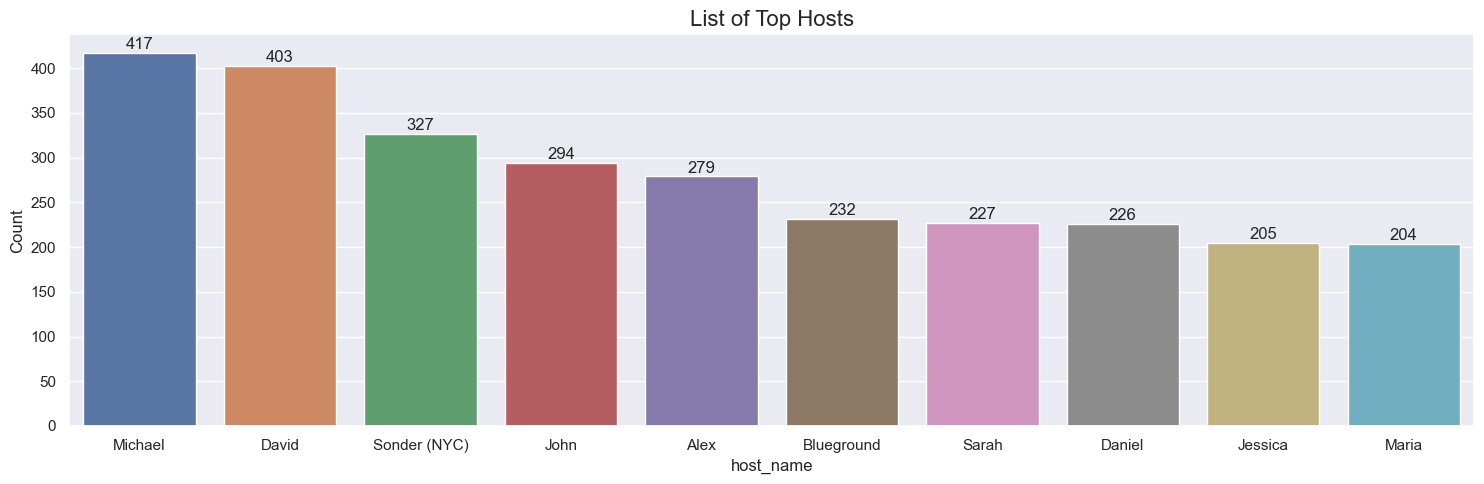

In [85]:
# Top 10 host's
plt.figure(figsize=(15,5))
# Create the bar plot
sns.barplot(x = df.host_name.value_counts().index[:10] , y = df.host_name.value_counts().values[:10])
# Add data labels
for index, value in enumerate(df.host_name.value_counts().values[:10]):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
# Add y-axis label
plt.title('List of Top Hosts', fontsize=16)
plt.ylabel('Count')
plt.show()

### 7.8 Univariate Analysis of  'neighbourhood_group' feature

In [86]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [87]:
df.neighbourhood_group.value_counts(normalize= True) * 100

neighbourhood_group
Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: proportion, dtype: float64

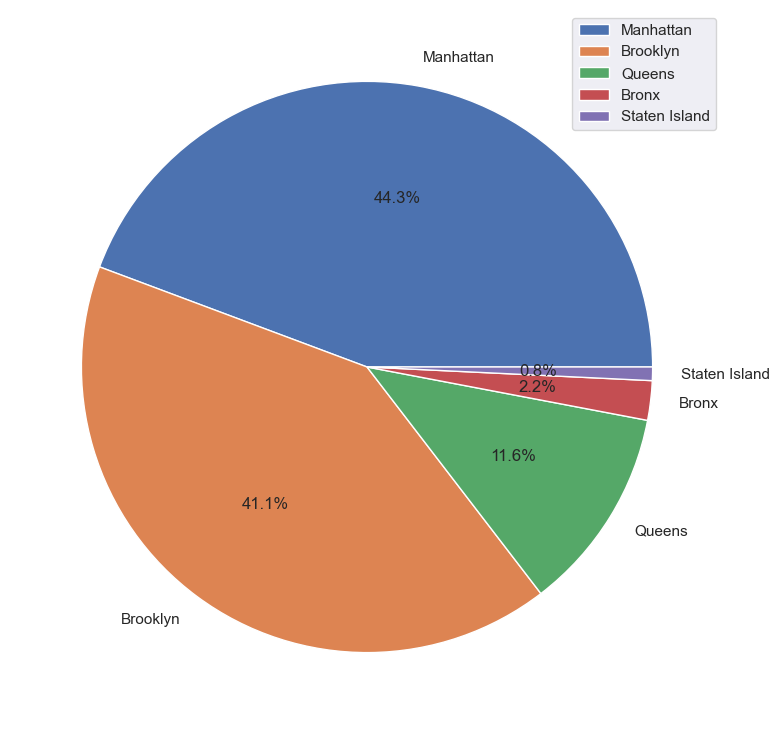

In [88]:
plt.figure(figsize=(8,8))
plt.pie(x=df.neighbourhood_group.value_counts(normalize=True) * 100, 
        labels=df.neighbourhood_group.value_counts(normalize=True).index, 
        autopct='%1.1f%%')  # Add autopct parameter to show percentages
plt.legend()
plt.show()

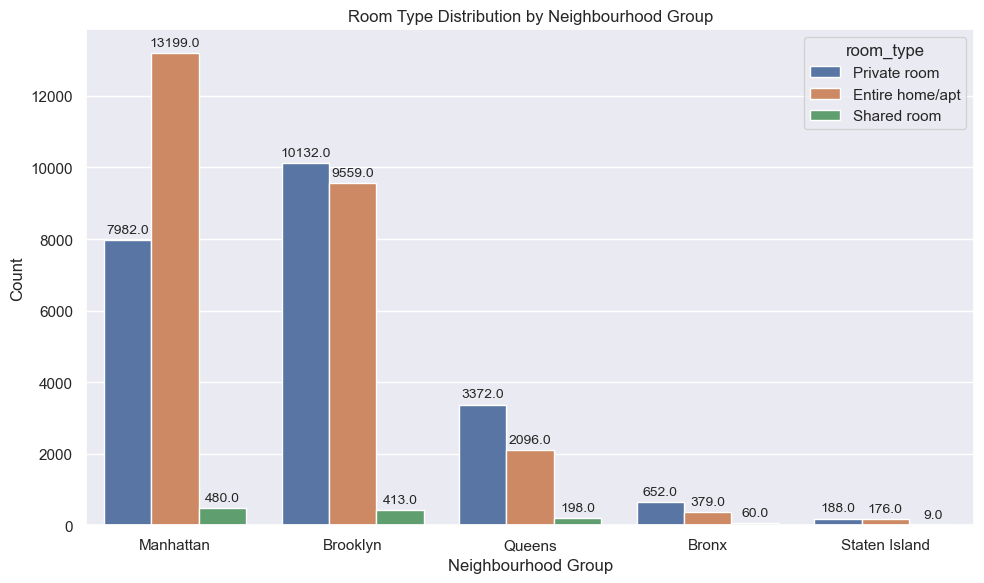

In [89]:
# Calculate the total count for each category
total_counts = df.groupby('neighbourhood_group')['room_type'].value_counts().unstack().sum(axis=1)

# Sort the categories by total count in descending order
sorted_categories = total_counts.sort_values(ascending=False).index

# Create a stacked bar chart with sorted categories
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='neighbourhood_group', hue='room_type', order=sorted_categories)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Room Type Distribution by Neighbourhood Group')

# Add data labels at the outside end of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height), 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', 
                va='bottom', 
                fontsize=10)

# Save the chart as an image file
plt.savefig('room_type_neighbourhood_group_sorted_with_labels.png')

# Display the chart
plt.show()

<div class="alert alert-block alert-success">
<b>Quick Check:</b> What are the neighbourhoods they need to target?
    ---> 81 % of the listing are Manhattan and Brooklyn neighbourhood_group
</div>

### 7.9 Univariate Analysis of  'neighbourhood column' feature

In [90]:
df.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [91]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


### 7.10 Univariate Analysis of  'room_type' feature

In [92]:
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [93]:
df.room_type.value_counts(normalize=True)*100

room_type
Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: proportion, dtype: float64

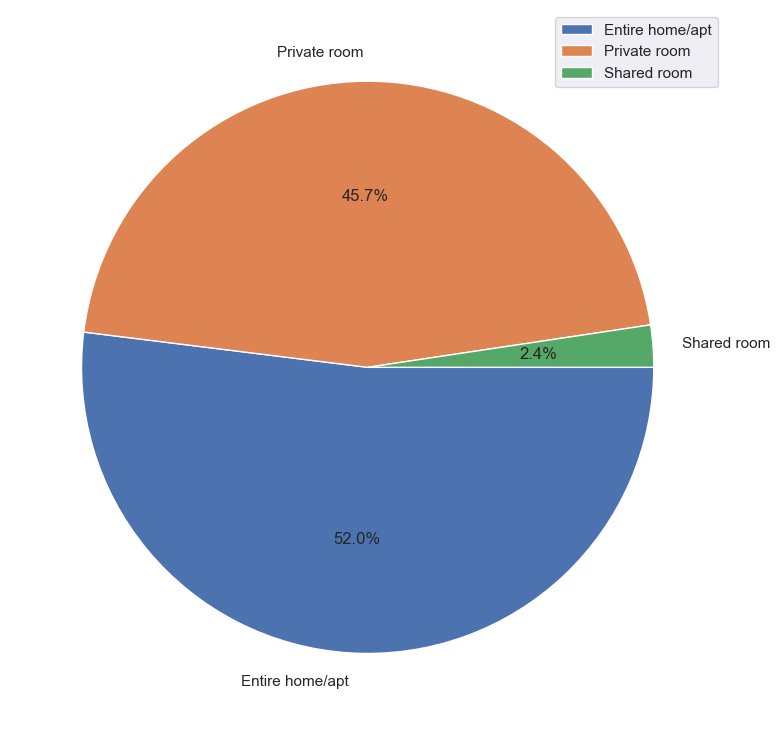

In [94]:
plt.figure(figsize=(8,8))
plt.pie(x = df.room_type.value_counts(normalize= True) * 100,labels = df.room_type.value_counts(normalize= True).index,counterclock=False, autopct='%1.1f%%')
plt.legend()
plt.show()

### 7.11 Univariate Analysis of  'price' feature

In [95]:
df.price.value_counts()

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

<Axes: ylabel='Frequency'>

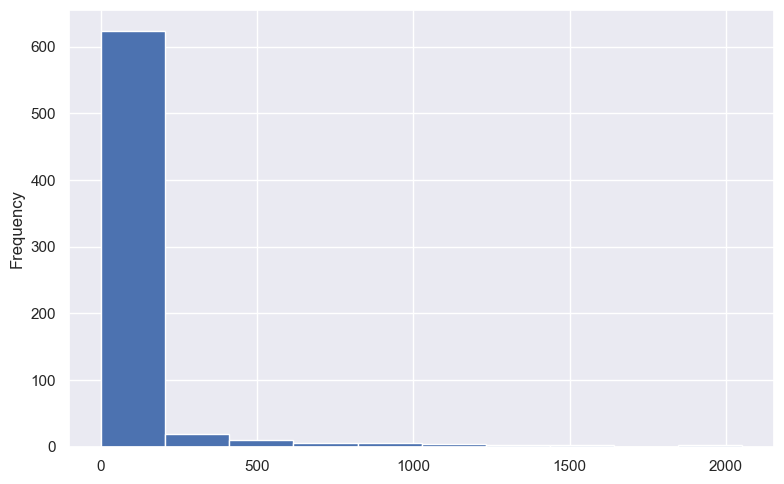

In [96]:
df.price.value_counts().plot.hist()

<Axes: xlabel='price', ylabel='Count'>

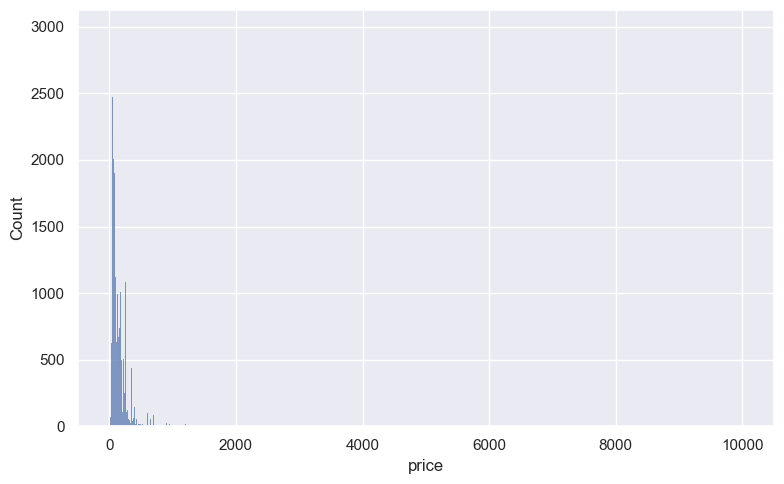

In [97]:
sns.histplot(data = df.price)

<Axes: xlabel='price', ylabel='Count'>

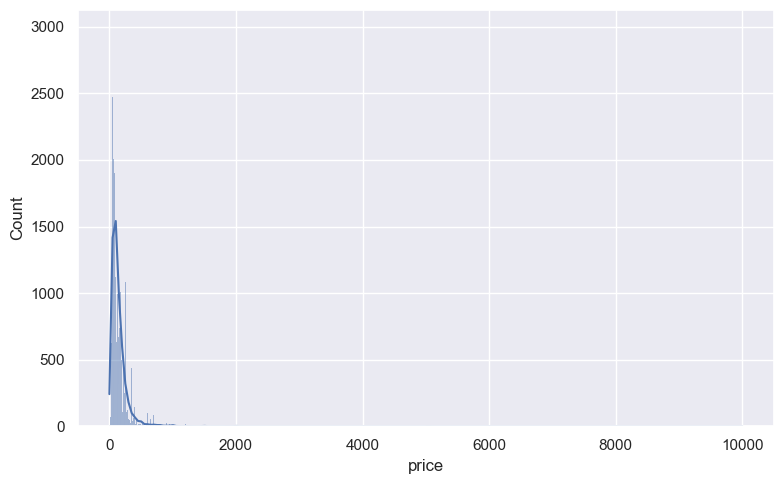

In [98]:
sns.histplot(data = df.price,kde = True)

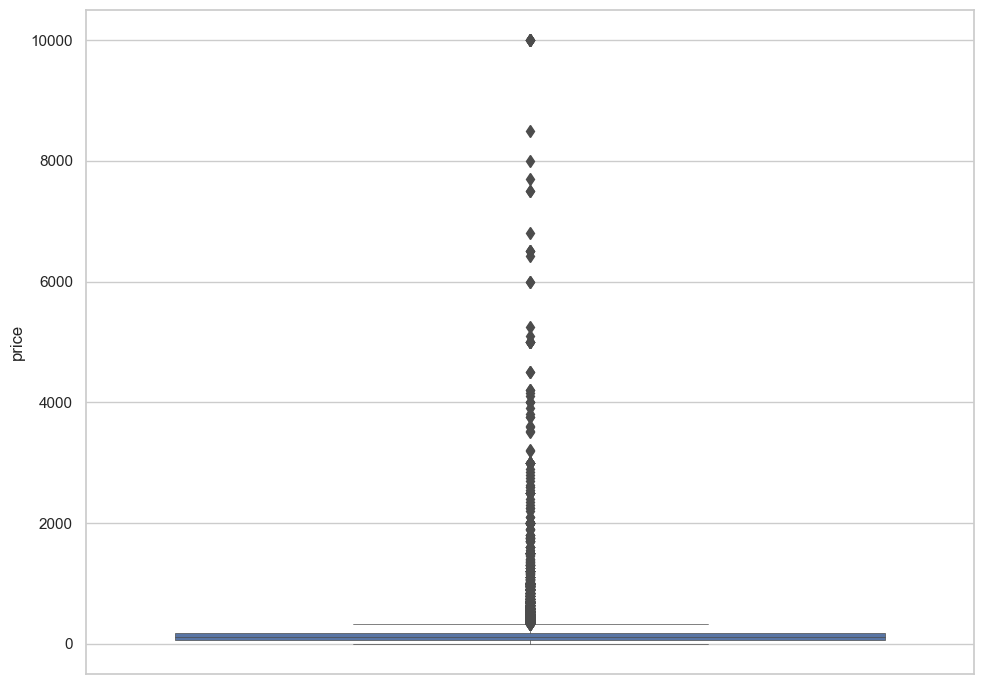

In [99]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.boxplot(y = df.price,width=0.8,
    dodge=True,
    fliersize=6,
    linewidth=.5,
    whis=1.5,
    color=None)
plt.show()

### 7.12 Univariate Analysis of  'minimum_nights' feature

In [100]:
df.minimum_nights.value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: count, Length: 109, dtype: int64

In [101]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

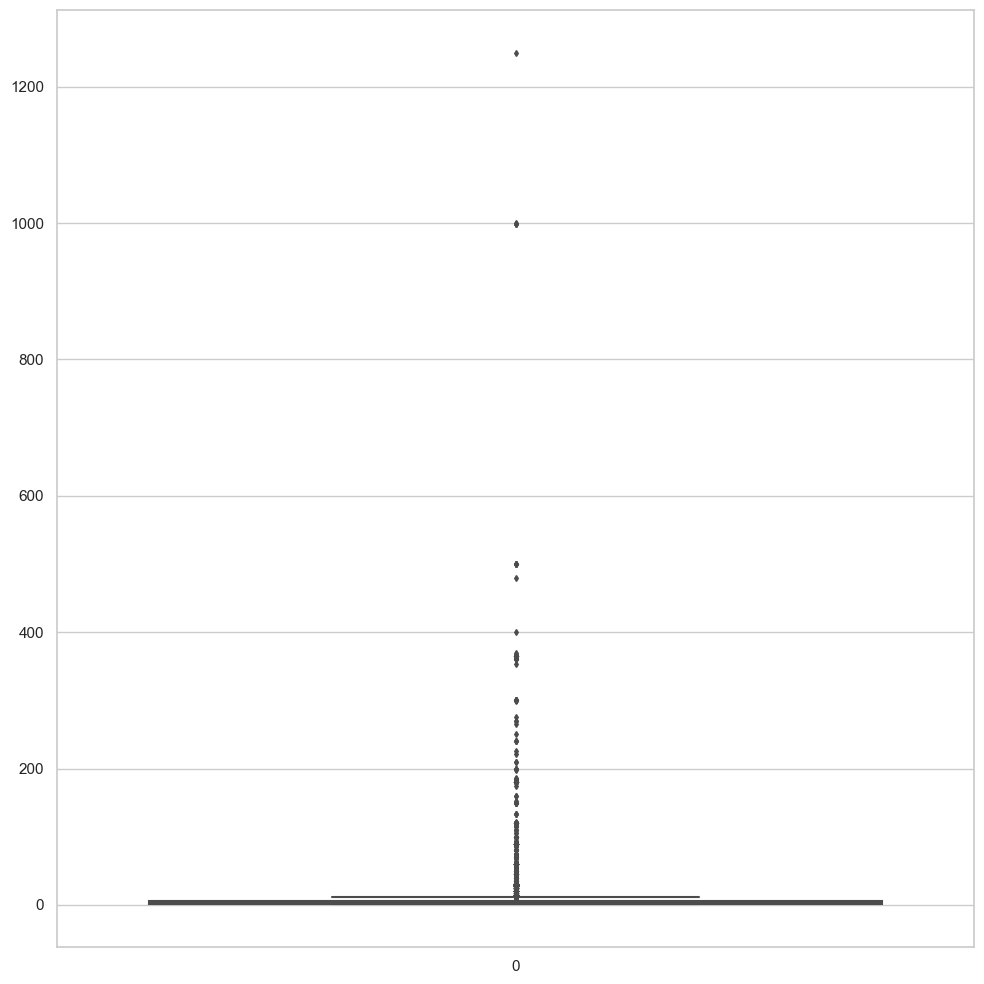

In [102]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df.minimum_nights,fliersize=3)
plt.show()

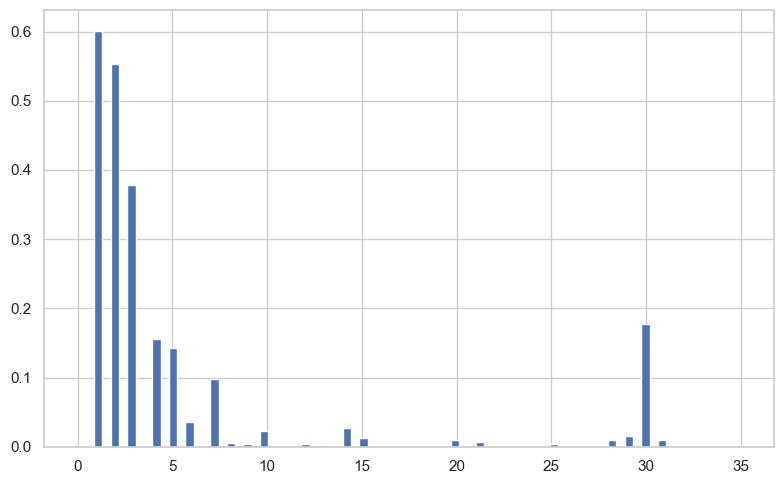

In [103]:
plt.hist(data = df, x = 'minimum_nights',bins=80,range=(0,35),density=True)
plt.show()

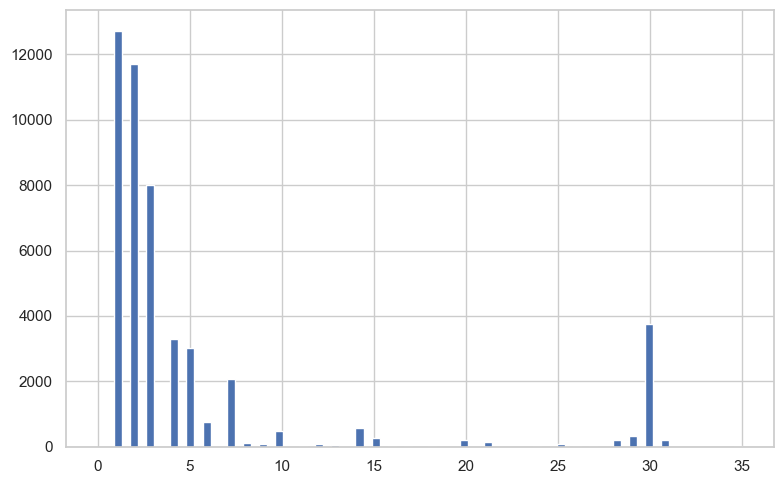

In [104]:
plt.hist(data = df, x = 'minimum_nights',bins=80,range=(0,35))
plt.show()

### 7.13 Univariate Analysis of  'number_of_reviews' feature

In [105]:
df.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

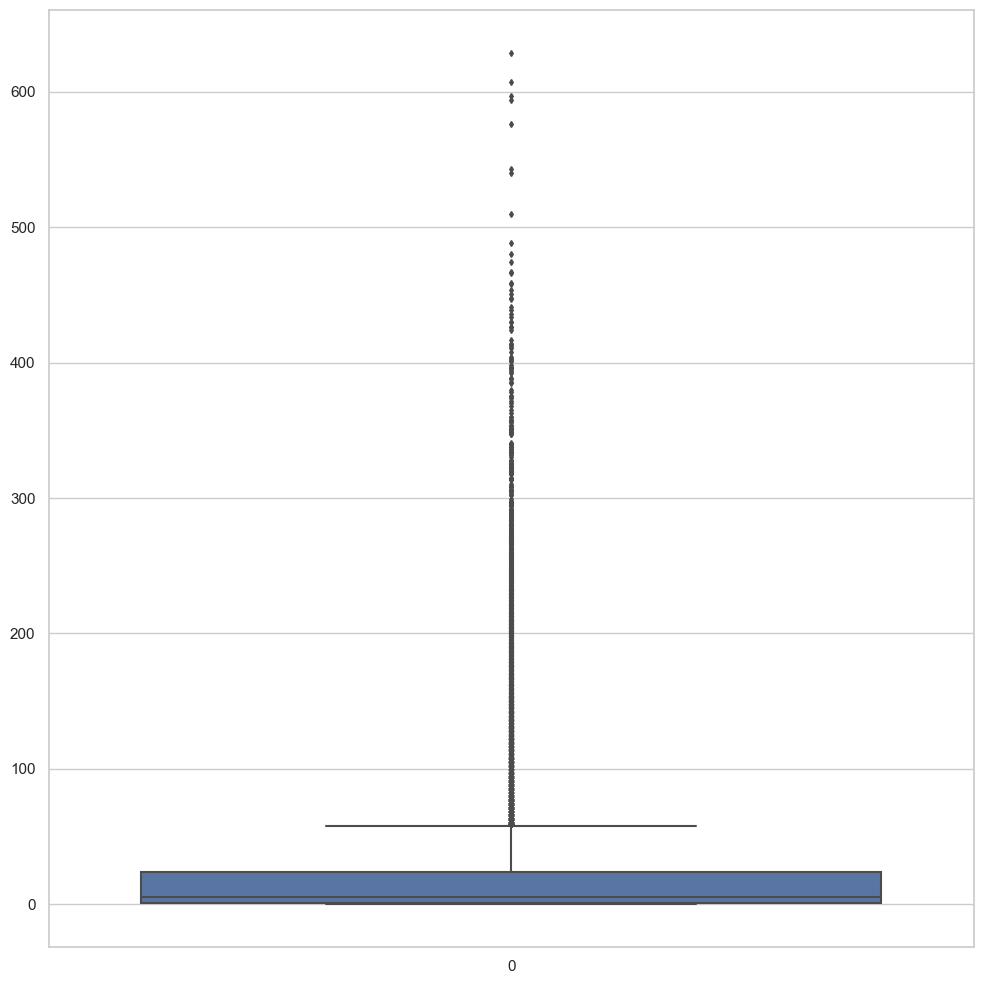

In [106]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df.number_of_reviews,fliersize=3)
plt.show()

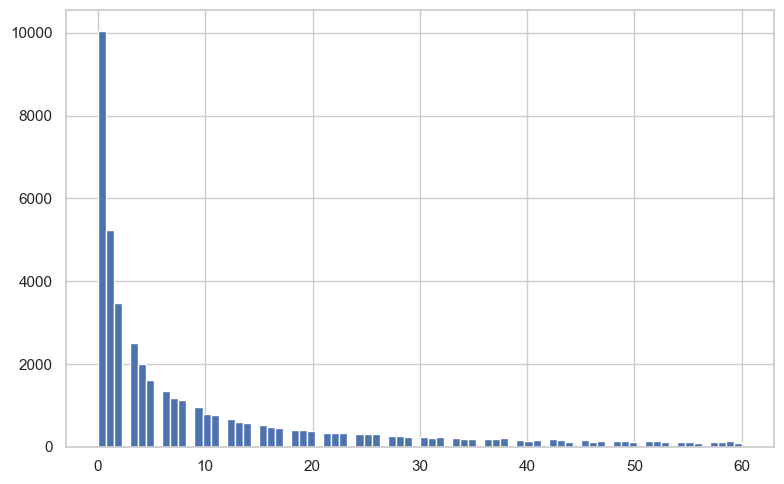

In [107]:
plt.hist(data = df, x = 'number_of_reviews',bins=80,range=(0,60))
plt.show()

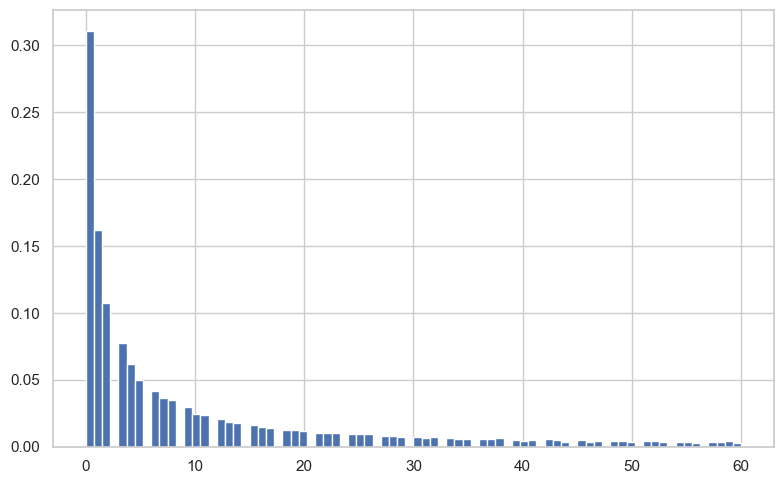

In [108]:
plt.hist(data = df, x = 'number_of_reviews',bins=80,range=(0,60),density=True)
plt.show()

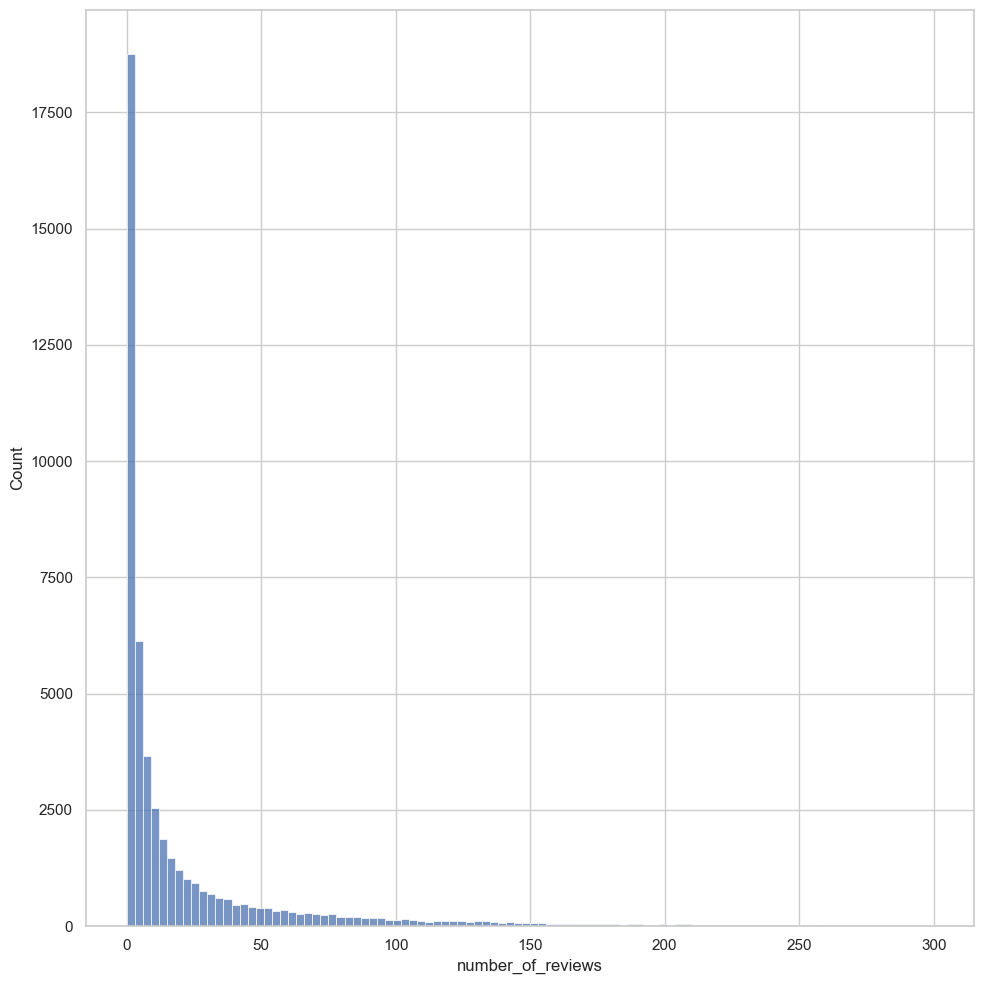

In [109]:
plt.figure(figsize = (10,10))
sns.histplot(data = df, x = 'number_of_reviews',bins=100,binrange=(0,300))
plt.show()

### 7.14 Univariate Analysis of  'reviews_per_month' feature

In [110]:
df.reviews_per_month.describe()

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

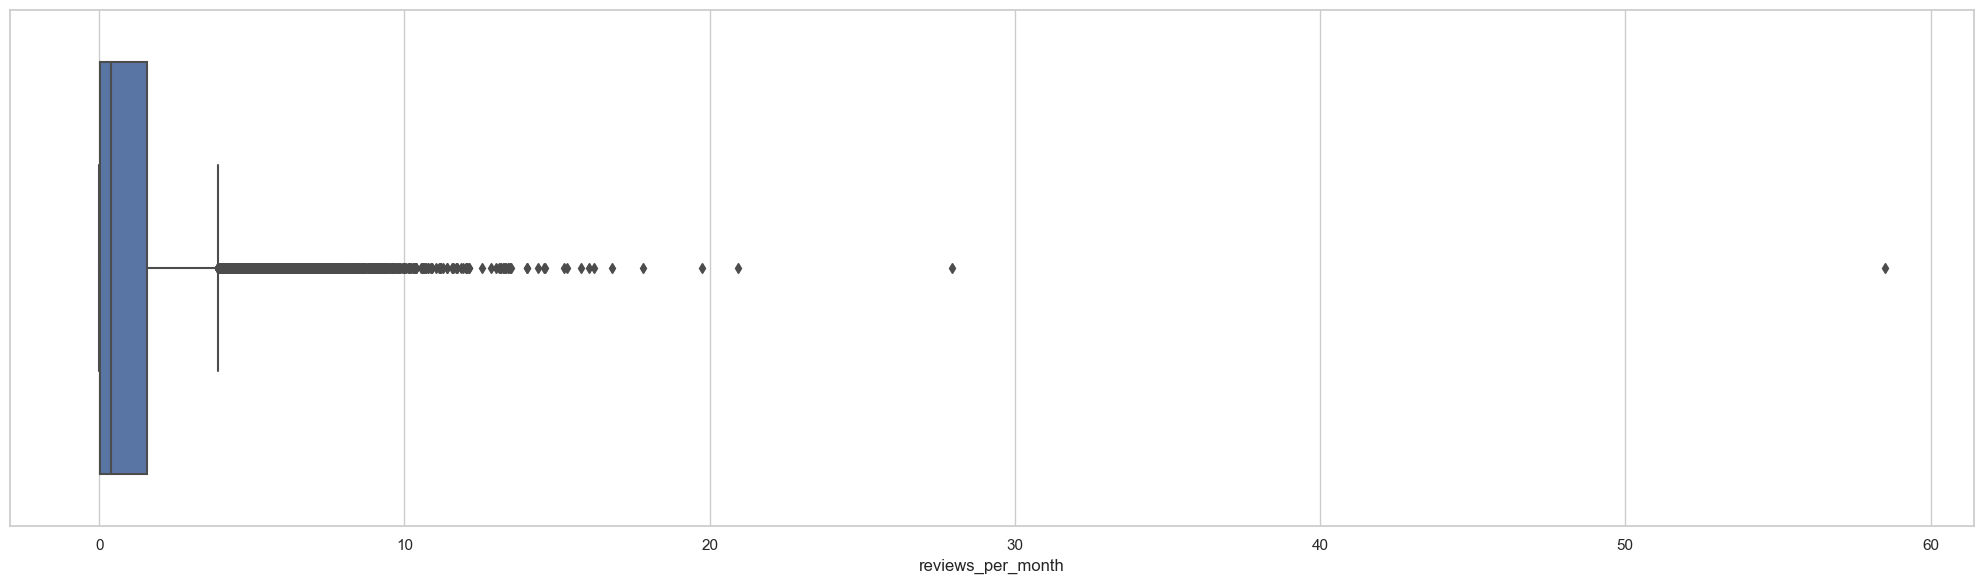

In [111]:
plt.figure(figsize = (20,6))
sns.boxplot(data = df , x = 'reviews_per_month')
plt.show()

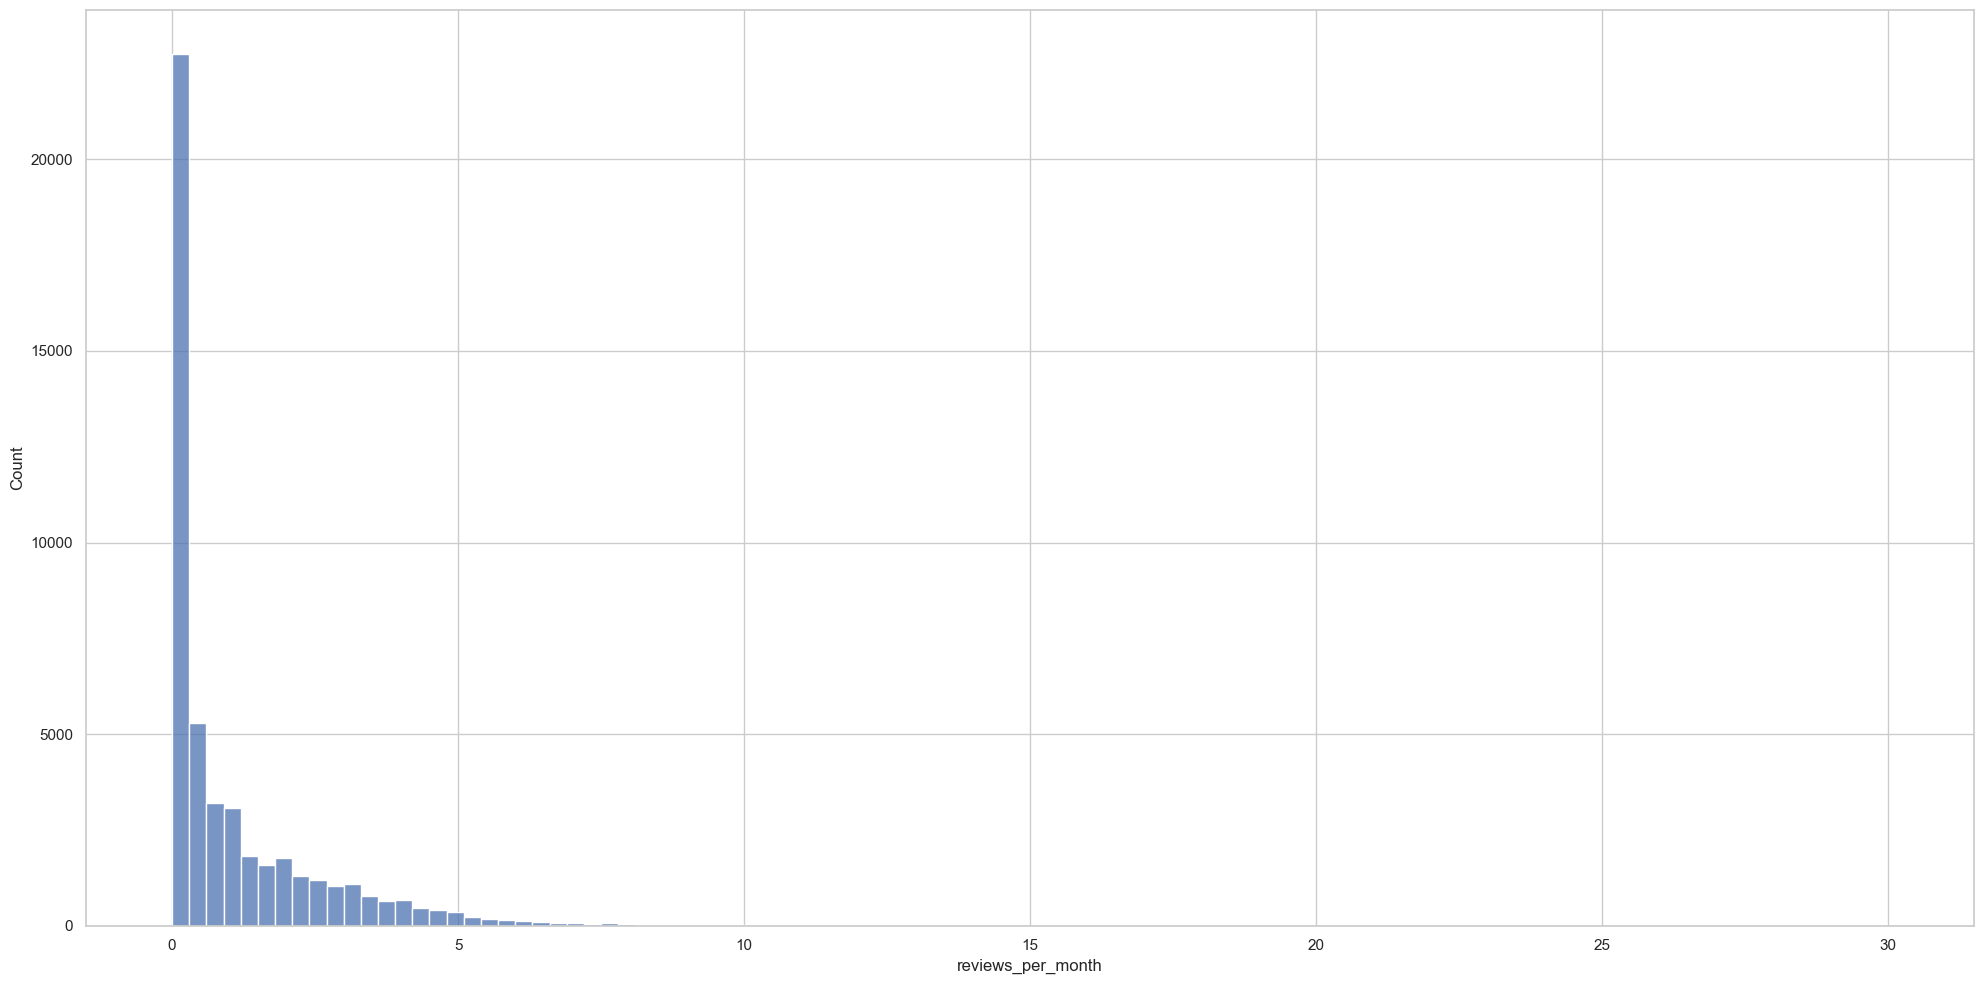

In [112]:
plt.figure(figsize = (20,10))
sns.histplot(data = df, x = 'reviews_per_month',bins=100,binrange=(0,30))
plt.show()

In [113]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


### 7.15 Univariate Analysis of  'calculated_host_listings_count' feature

In [114]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

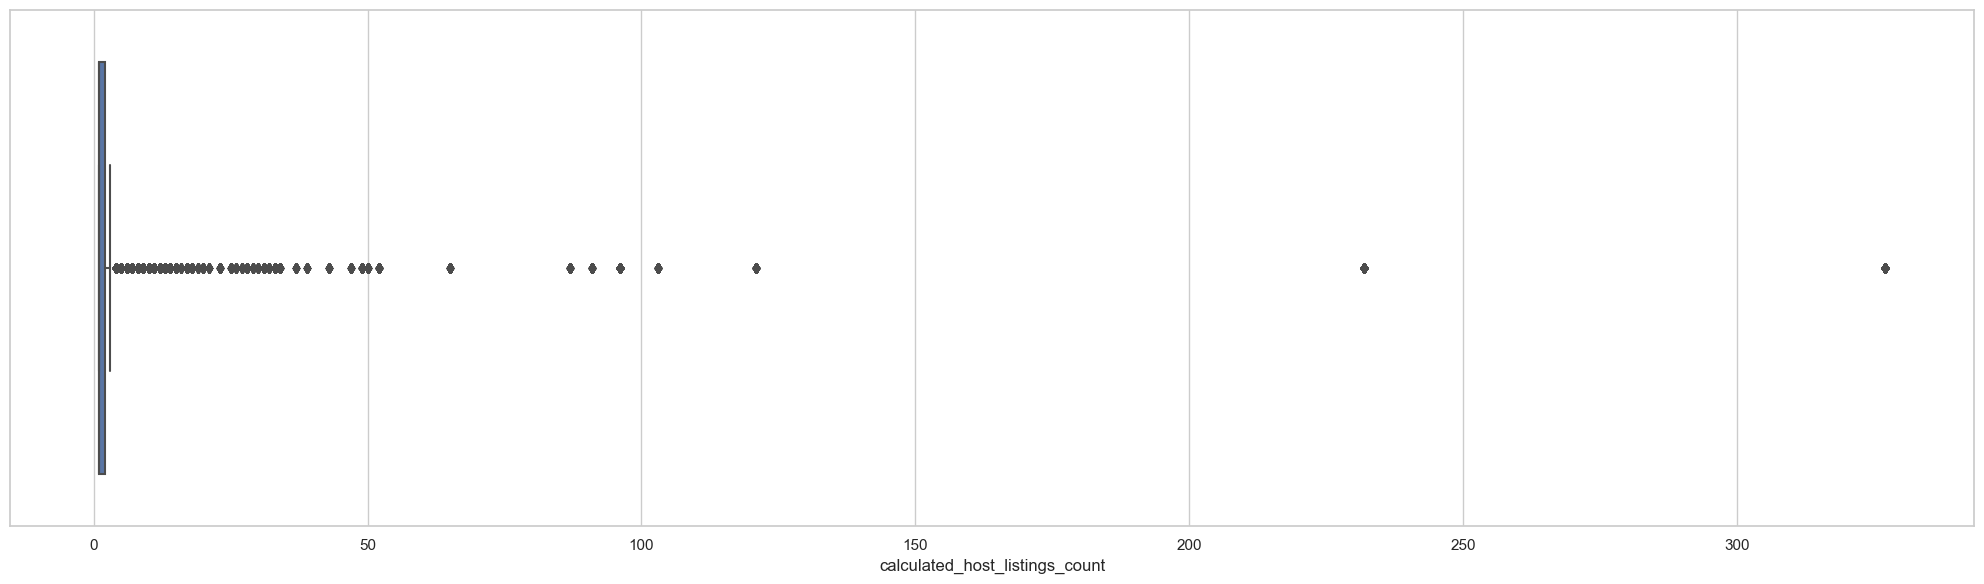

In [115]:
plt.figure(figsize = (20,6))
sns.boxplot(data = df , x = 'calculated_host_listings_count')
plt.show()

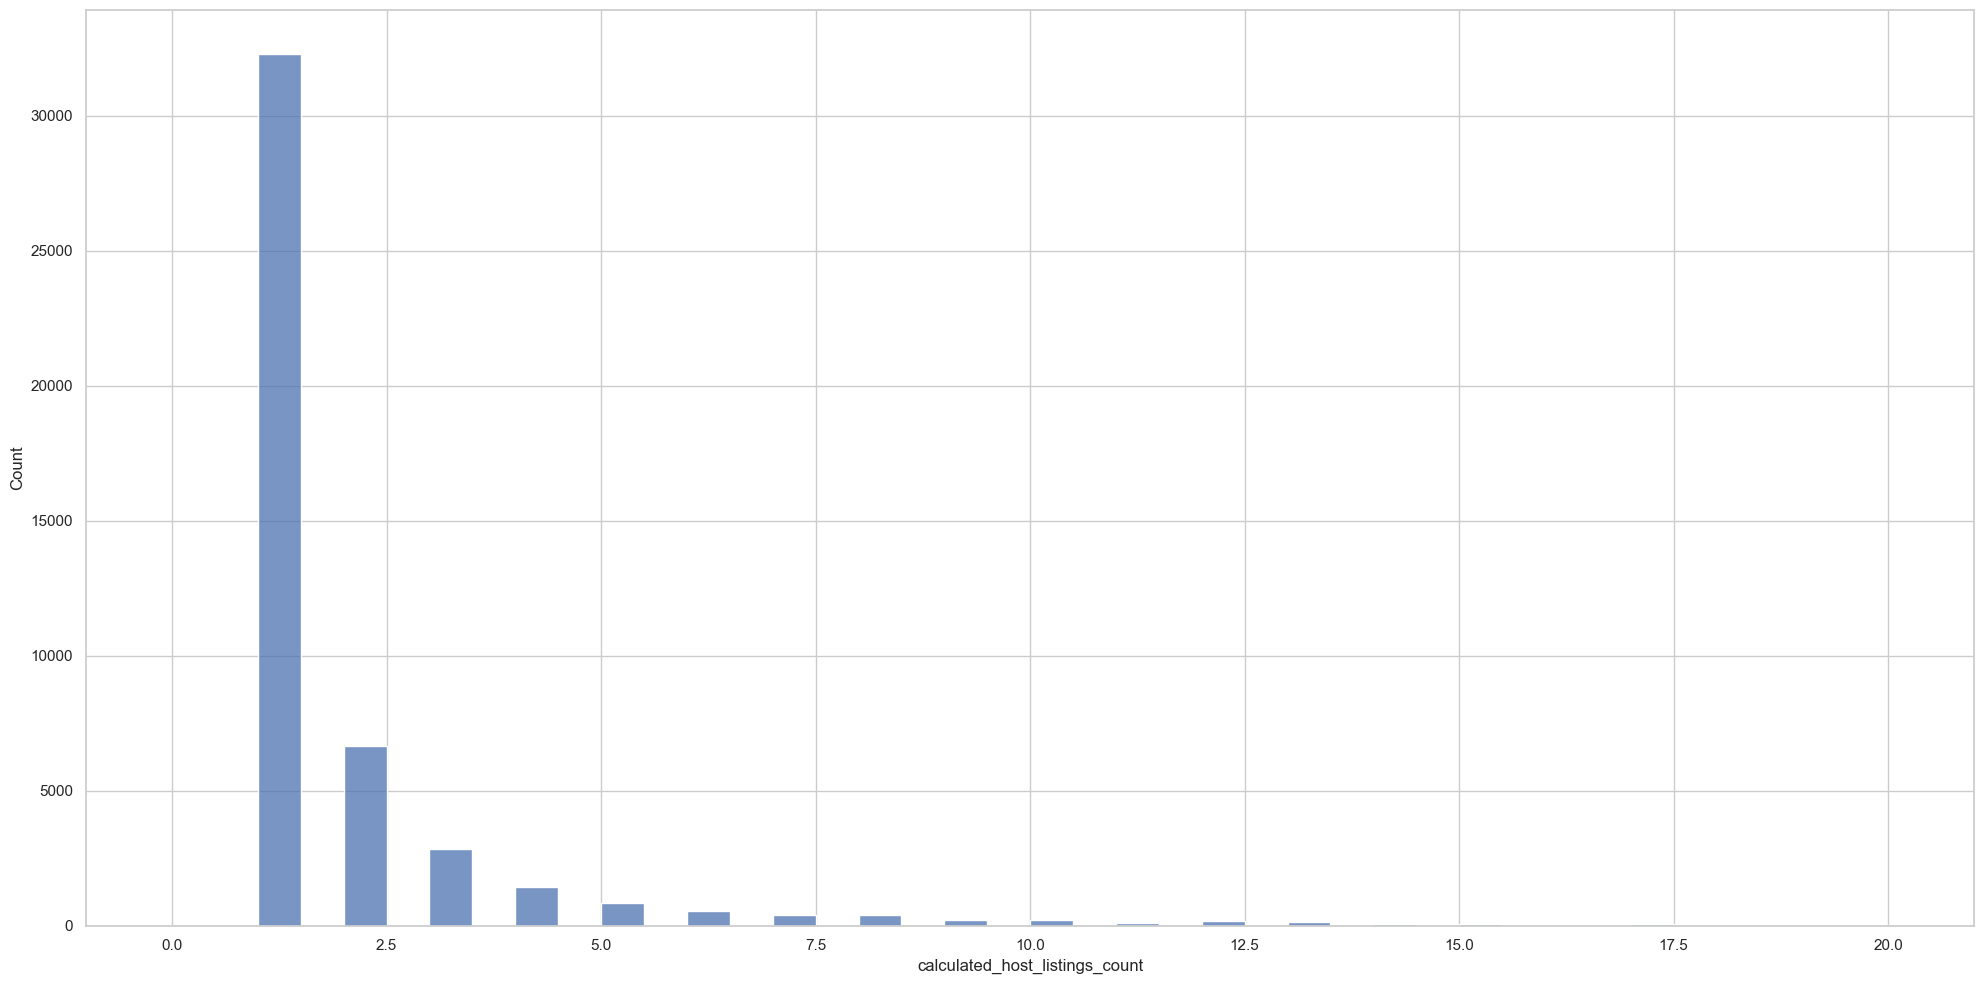

In [116]:
plt.figure(figsize = (20,10))
sns.histplot(data = df, x = 'calculated_host_listings_count',bins=40,binrange=(0,20))
plt.show()

### 7.16 Univariate Analysis of  'availability_365' feature

In [117]:
df.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

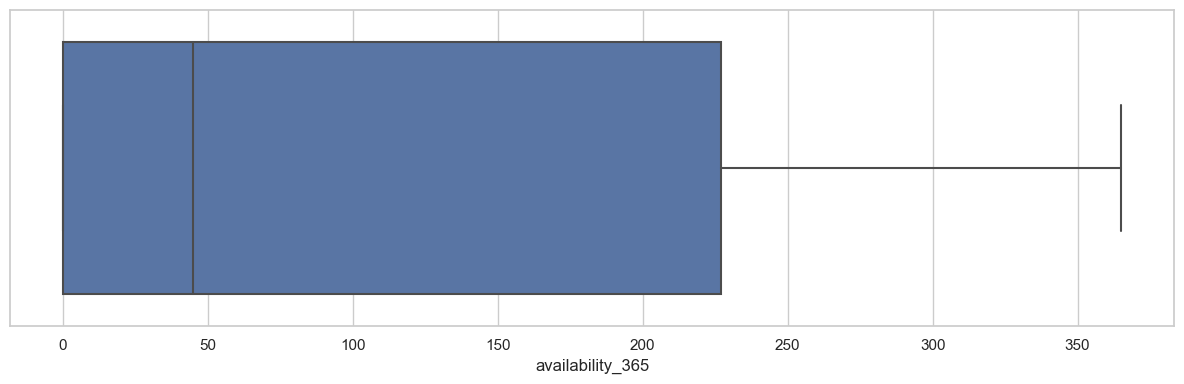

In [118]:
plt.figure(figsize = (12,4))
sns.boxplot(data = df , x = 'availability_365')
plt.show()

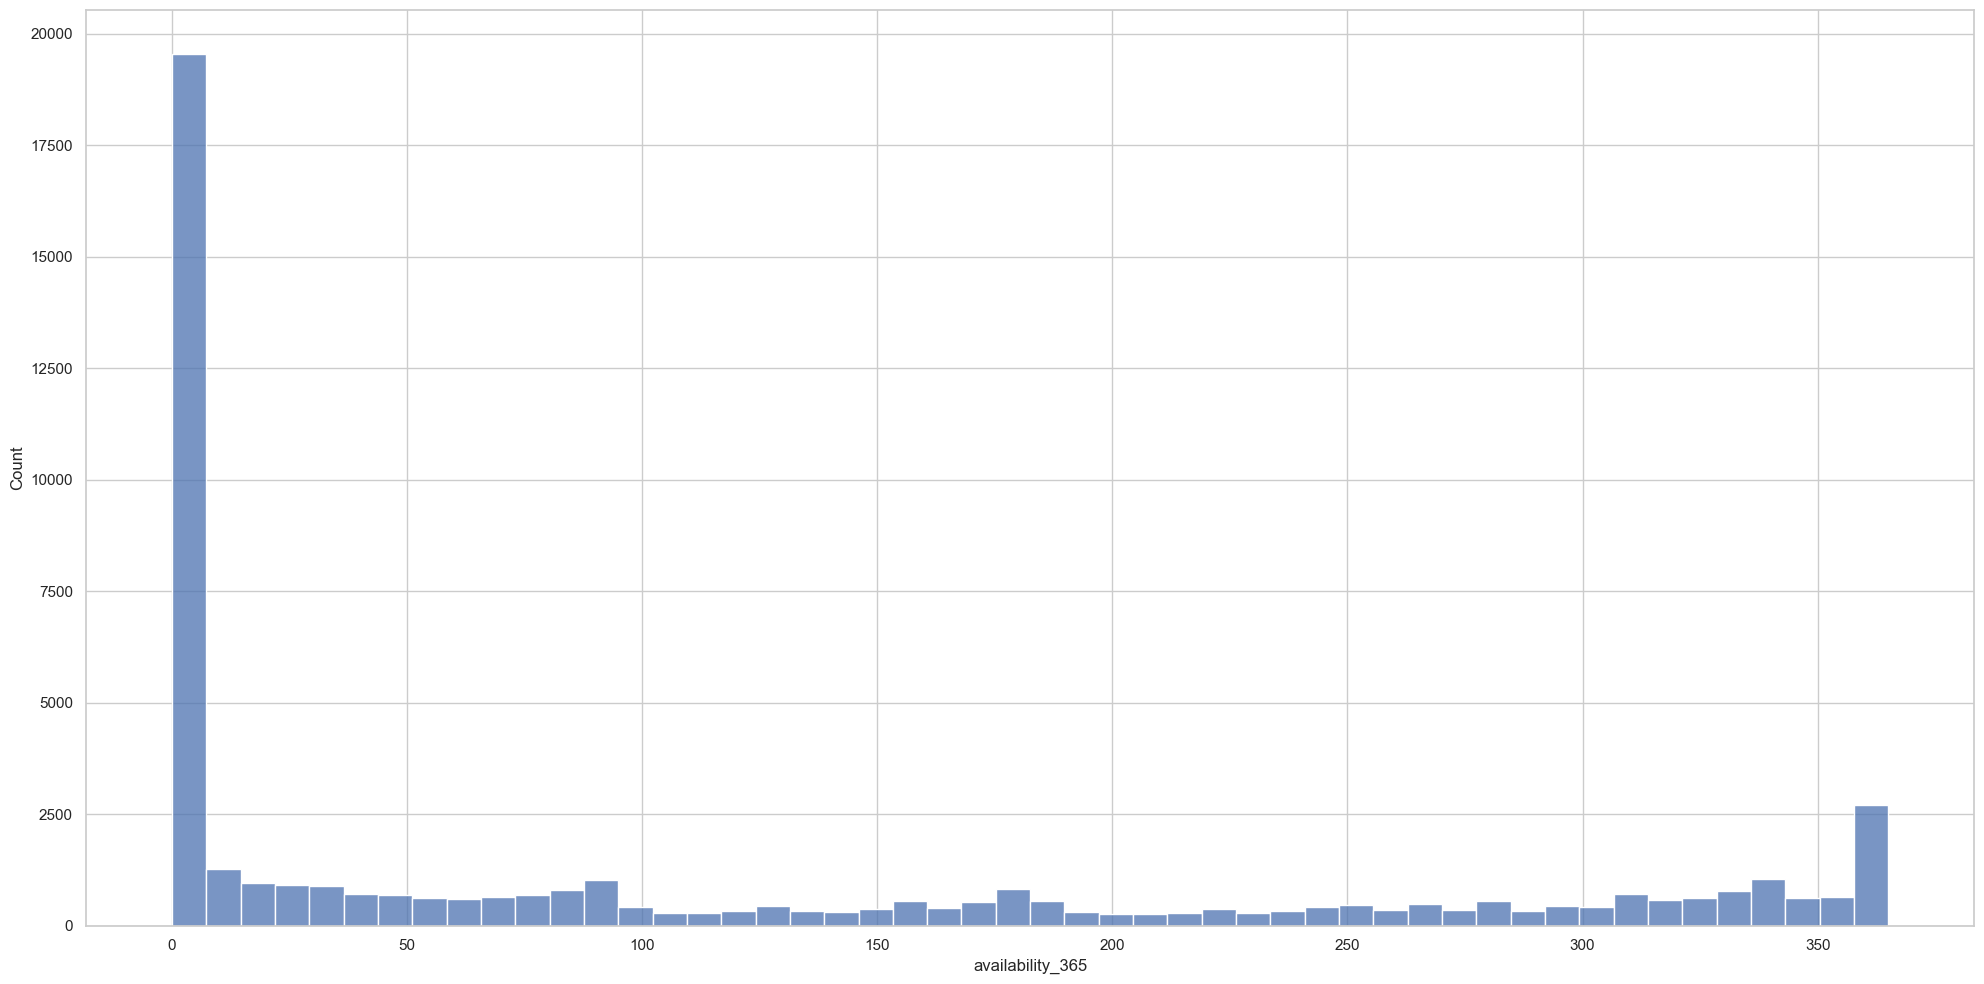

In [119]:
plt.figure(figsize = (20,10))
sns.histplot(data = df, x = 'availability_365',bins=50,binrange=(0,365))
plt.show()

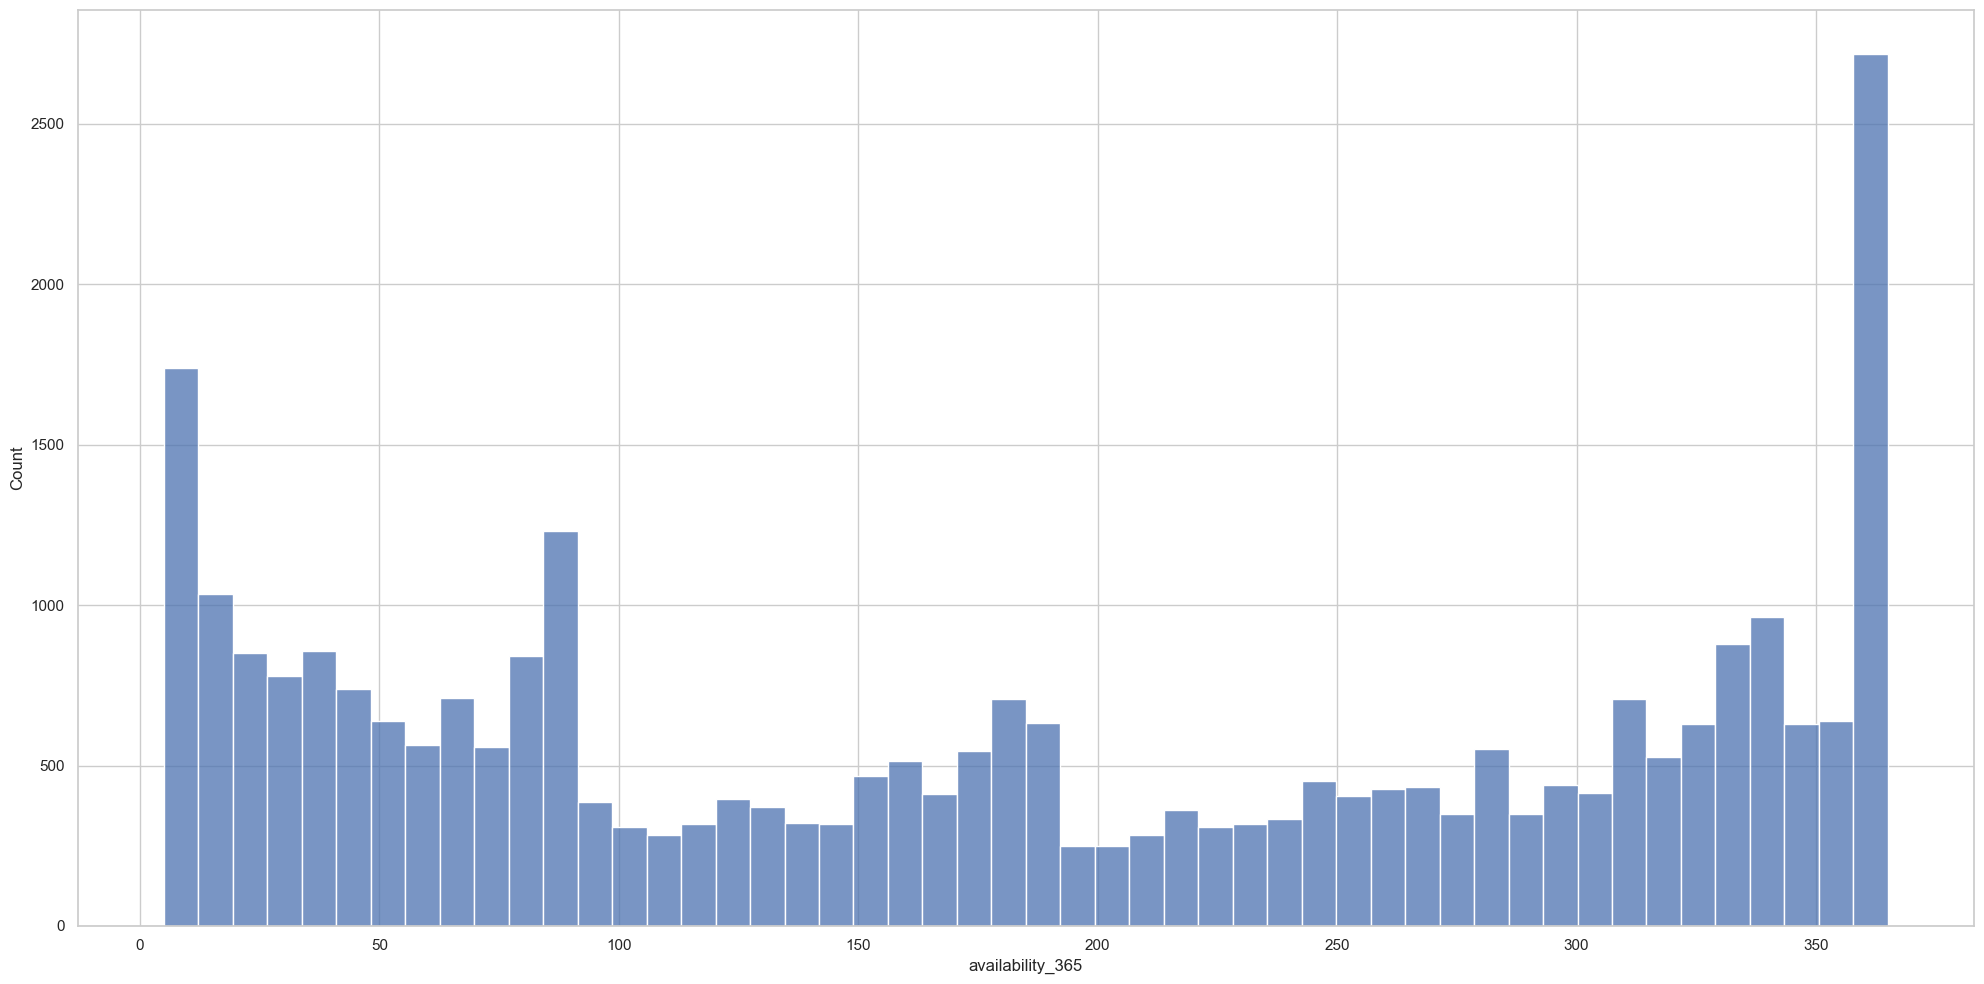

In [120]:
plt.figure(figsize = (20,10))
sns.histplot(data = df, x = 'availability_365',bins=50,binrange=(5,365))
plt.show()

### 7.17 Univariate Analysis of  'minimum_night_categories' feature

In [121]:
df.minimum_night_categories.value_counts(normalize= True)*100

minimum_night_categories
Low          40.280192
Very Low     26.014930
Very High    14.997444
Medium       12.960425
High          5.747009
Name: proportion, dtype: float64

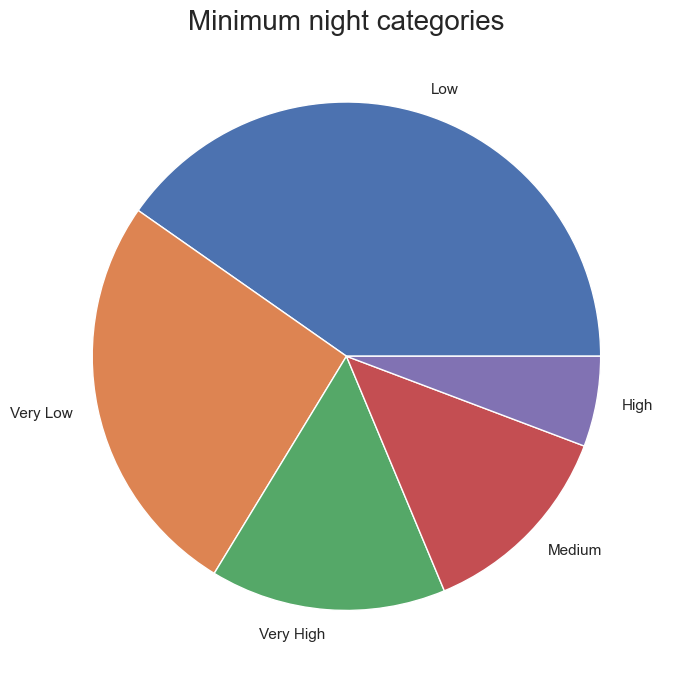

In [122]:
plt.figure(figsize=(12,7))
plt.title('Minimum night categories', fontdict={'fontsize': 20})
plt.pie(x = df.minimum_night_categories.value_counts(),labels=df.minimum_night_categories.value_counts().index)
plt.show()

In [123]:
df.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

### 7.18 Univariate Analysis of  'number_of_reviews_categories' feature

In [124]:
df.number_of_reviews_categories.value_counts()

number_of_reviews_categories
Low          26032
Very Low     12720
High          5893
Medium        3503
Very High      747
Name: count, dtype: int64

In [125]:
df.number_of_reviews_categories.value_counts(normalize=True)*100

number_of_reviews_categories
Low          53.240618
Very Low     26.014930
High         12.052357
Medium        7.164332
Very High     1.527764
Name: proportion, dtype: float64

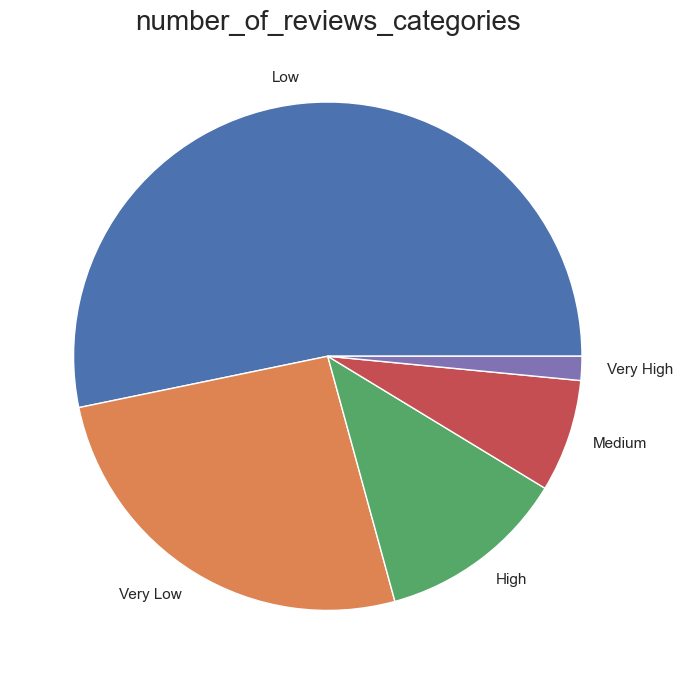

In [126]:
plt.figure(figsize=(12,7))
plt.title('number_of_reviews_categories', fontdict={'fontsize': 20})
plt.pie(x = df.number_of_reviews_categories.value_counts(),labels=df.number_of_reviews_categories.value_counts().index)
plt.show()

### 7.19 Univariate Analysis of  'price_categories' feature

In [127]:
df['price_categories'].value_counts()

price_categories
Low          22998
Very Low     12720
Medium        7556
High          5447
Very High      174
Name: count, dtype: int64

In [128]:
df['price_categories'].value_counts(normalize=True)*100

price_categories
Low          47.035484
Very Low     26.014930
Medium       15.453523
High         11.140198
Very High     0.355865
Name: proportion, dtype: float64

In [129]:
df['price_categories'].describe()

count     48895
unique        5
top         Low
freq      22998
Name: price_categories, dtype: object

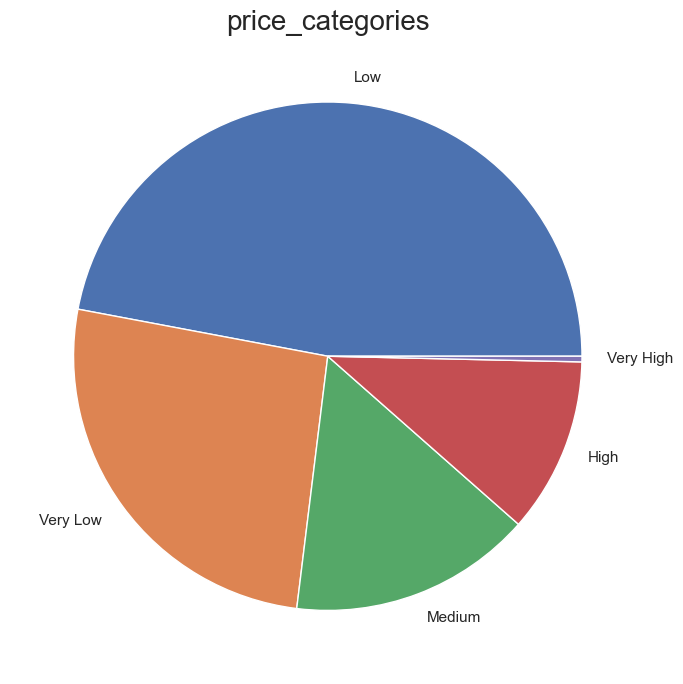

In [130]:
plt.figure(figsize=(12,7))
plt.title('price_categories', fontdict={'fontsize': 20})
plt.pie(x = df.price_categories.value_counts(),labels=df.price_categories.value_counts().index,)
plt.show()

In [131]:
47.035484 + 26.014930

73.05041399999999

<div class="alert alert-block alert-success">
<b>Quick Check:</b>  What is the pricing ranges preferred by customers?
    ---> 'Low' price ranges are preferred by custumers followed by very 'Low' price ranges.
</div>

# 8. Bivariate and Multivariate Analysis

### 8.1 Finding the correlations

In [132]:
df[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,0.00,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [133]:
df[numerical_columns].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


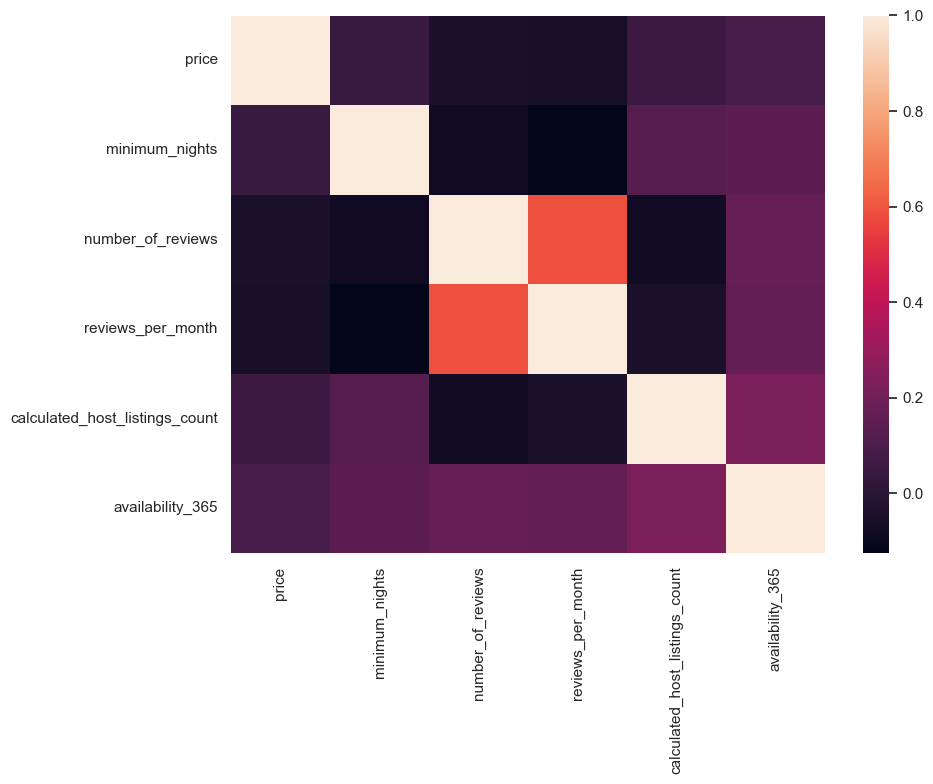

In [134]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df[numerical_columns].corr())
plt.show()

### 8.2 Finding Top correlations

In [135]:
corr_matrix = df[numerical_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [136]:
corr_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,0.047954,0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,0.080116,0.124905,0.127960,0.144303
number_of_reviews,0.047954,0.080116,1.000000,0.589407,0.072376,0.172028
reviews_per_month,0.050564,0.124905,0.589407,1.000000,0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,0.072376,0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [137]:
sol

number_of_reviews               reviews_per_month                 0.589407
calculated_host_listings_count  availability_365                  0.225701
number_of_reviews               availability_365                  0.172028
reviews_per_month               availability_365                  0.163732
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.124905
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews               calculated_host_listings_count    0.072376
price                           calculated_host_listings_count    0.057472
                                reviews_per_month                 0.050564
                                number_of_reviews                 0.047954
reviews_per_month        

In [138]:
# Top meaningful correlations
sol[1:8]

calculated_host_listings_count  availability_365                  0.225701
number_of_reviews               availability_365                  0.172028
reviews_per_month               availability_365                  0.163732
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.124905
price                           availability_365                  0.081829
dtype: float64

### 8.3 'number_of_reviews_categories' vs 'price'

In [139]:
# prices for each of reviews_categories
x1 = df.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
Low          4002323
Very Low     1806531
High          971346
Medium        508647
Very High     178431
Name: price, dtype: int64

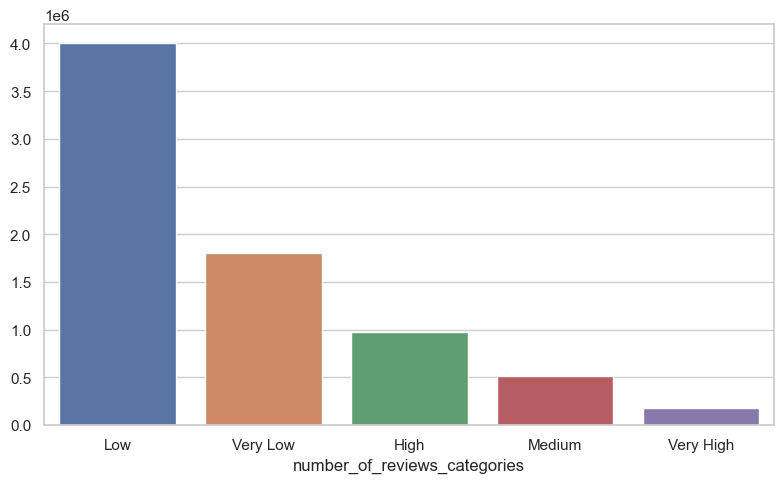

In [140]:
plt.figure(figsize=(8,5))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<Axes: xlabel='number_of_reviews_categories', ylabel='price'>

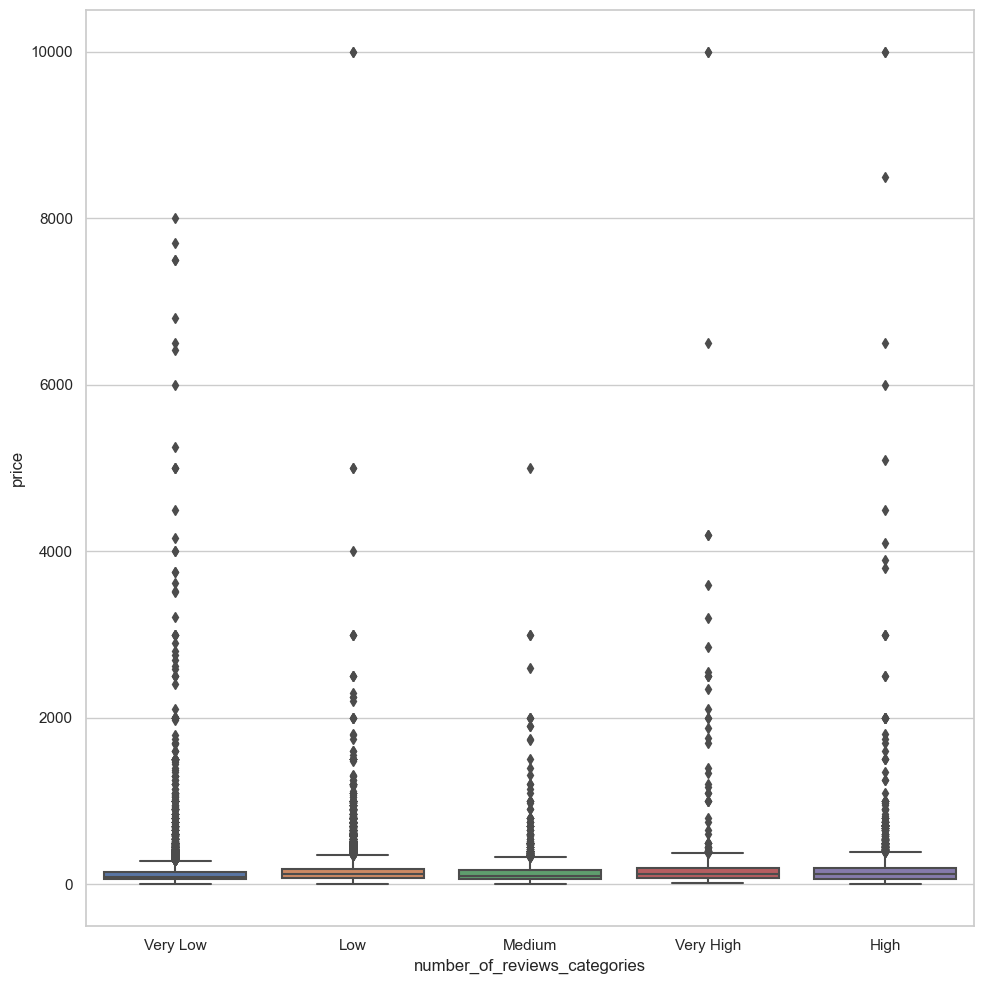

In [141]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df.number_of_reviews_categories , y = df.price)

In [142]:
df.groupby('number_of_reviews_categories').price.mean().sort_values(ascending=True)

number_of_reviews_categories
Very Low     142.022877
Medium       145.203254
Low          153.746274
High         164.830477
Very High    238.863454
Name: price, dtype: float64

In [143]:
df.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
Very Low      90.0
Medium       105.0
High         120.0
Low          120.0
Very High    120.0
Name: price, dtype: float64

In [144]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,Low,4002323
1,Very Low,1806531
2,High,971346
3,Medium,508647
4,Very High,178431


In [145]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
Very High     2.389505
Medium        6.811679
High         13.008033
Very Low     24.192631
Low          53.598152
Name: price, dtype: float64

<div class="alert alert-block alert-success">
<b>Quick Check:</b> What is the pricing ranges preferred by customer
    ---> The total price for  'Low' or 'very Low' number_of_reviews_categories are high.
</div>

### 8.4 'room_type' vs  'number_of_reviews_categories'

In [146]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


In [147]:
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [148]:
pd.crosstab(df['room_type'], df['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,Very High,Very Low
room_type,,,,,
Entire home/apt,3809,14909,1960,504,4227
Private room,1950,10769,1494,226,7887
Shared room,134,354,49,17,606


In [149]:
df.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [150]:
df.groupby('room_type').number_of_reviews.sum()/df.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

<div class="alert alert-block alert-info">
<b>Inferences:</b> The various kinds of properties that exist w.r.t. customer preferences. Entire home/apt have more reviews than Shared rooms. 'Shared room' are less likey to give reviews, only 16 %
</div>

### 8.5 'room_type' vs 'price_categories' 

In [151]:
pd.crosstab(df['room_type'], df['price_categories'])

price_categories,High,Low,Medium,Very High,Very Low
room_type,,,,,
Entire home/apt,3714,13086,4262,120,4227
Private room,1620,9597,3170,52,7887
Shared room,113,315,124,2,606


###  8.6 'room_type' vs 'reviews_per_month' 

In [152]:
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [153]:
df.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.045509
Private room       1.143493
Shared room        1.073345
Name: reviews_per_month, dtype: float64

In [154]:
df.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.350
Private room       0.400
Shared room        0.405
Name: reviews_per_month, dtype: float64

In [155]:
df.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

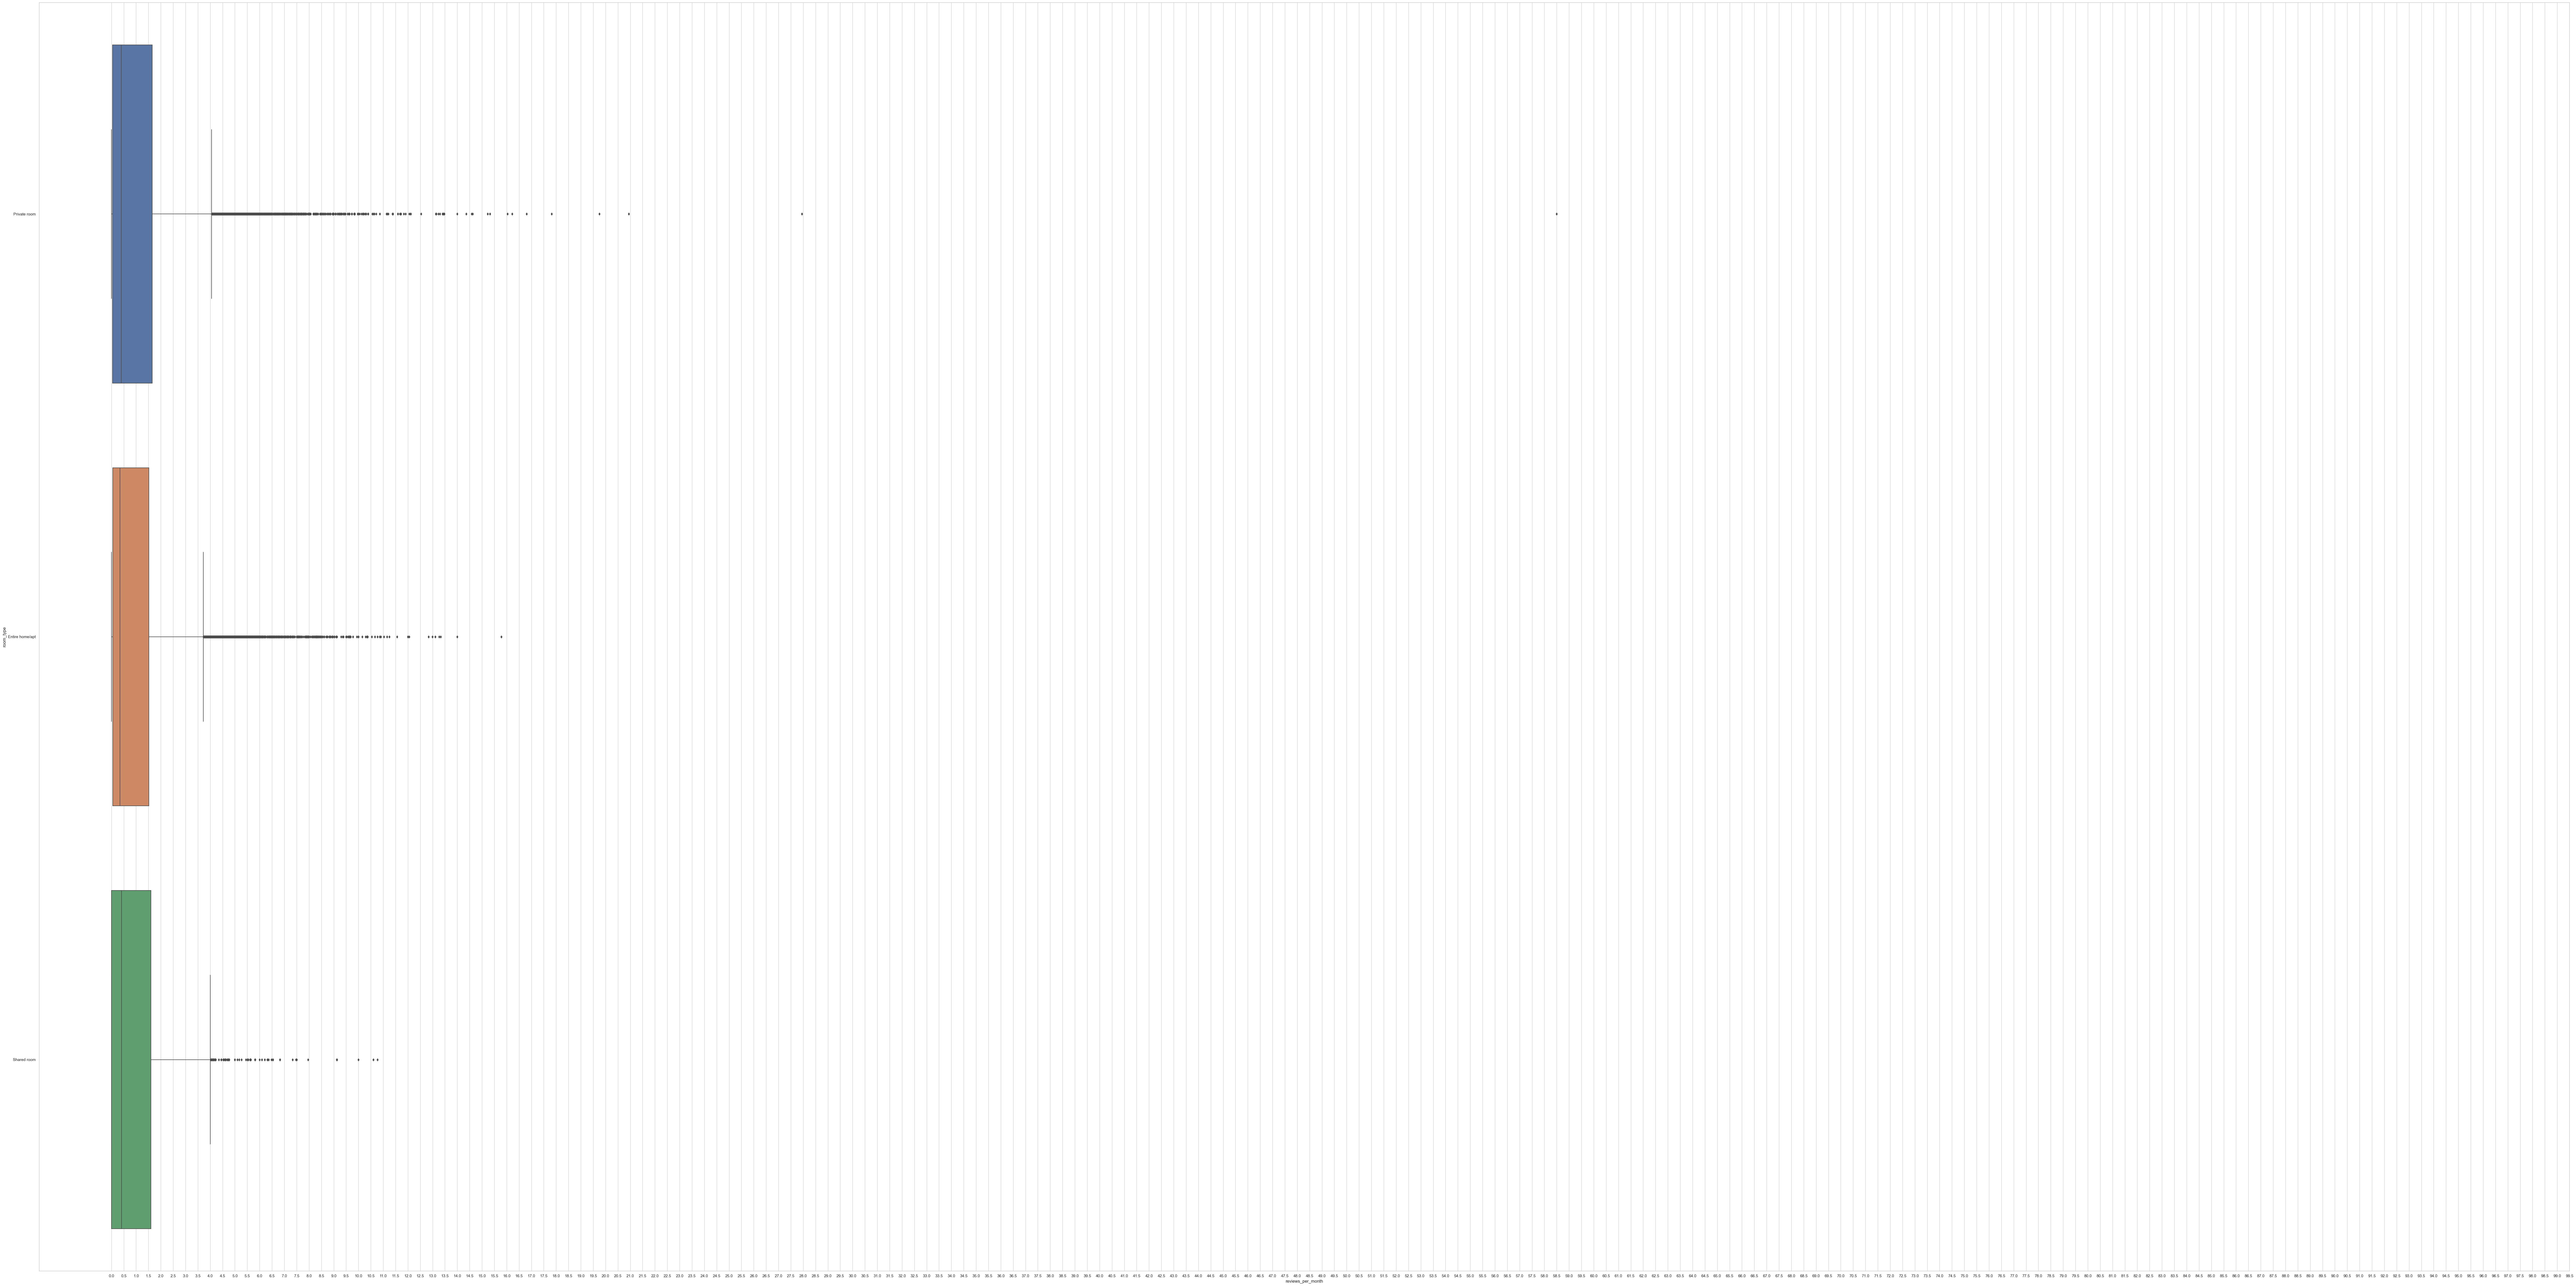

In [156]:
plt.figure(figsize=(100,50))
sns.boxplot(data = df, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

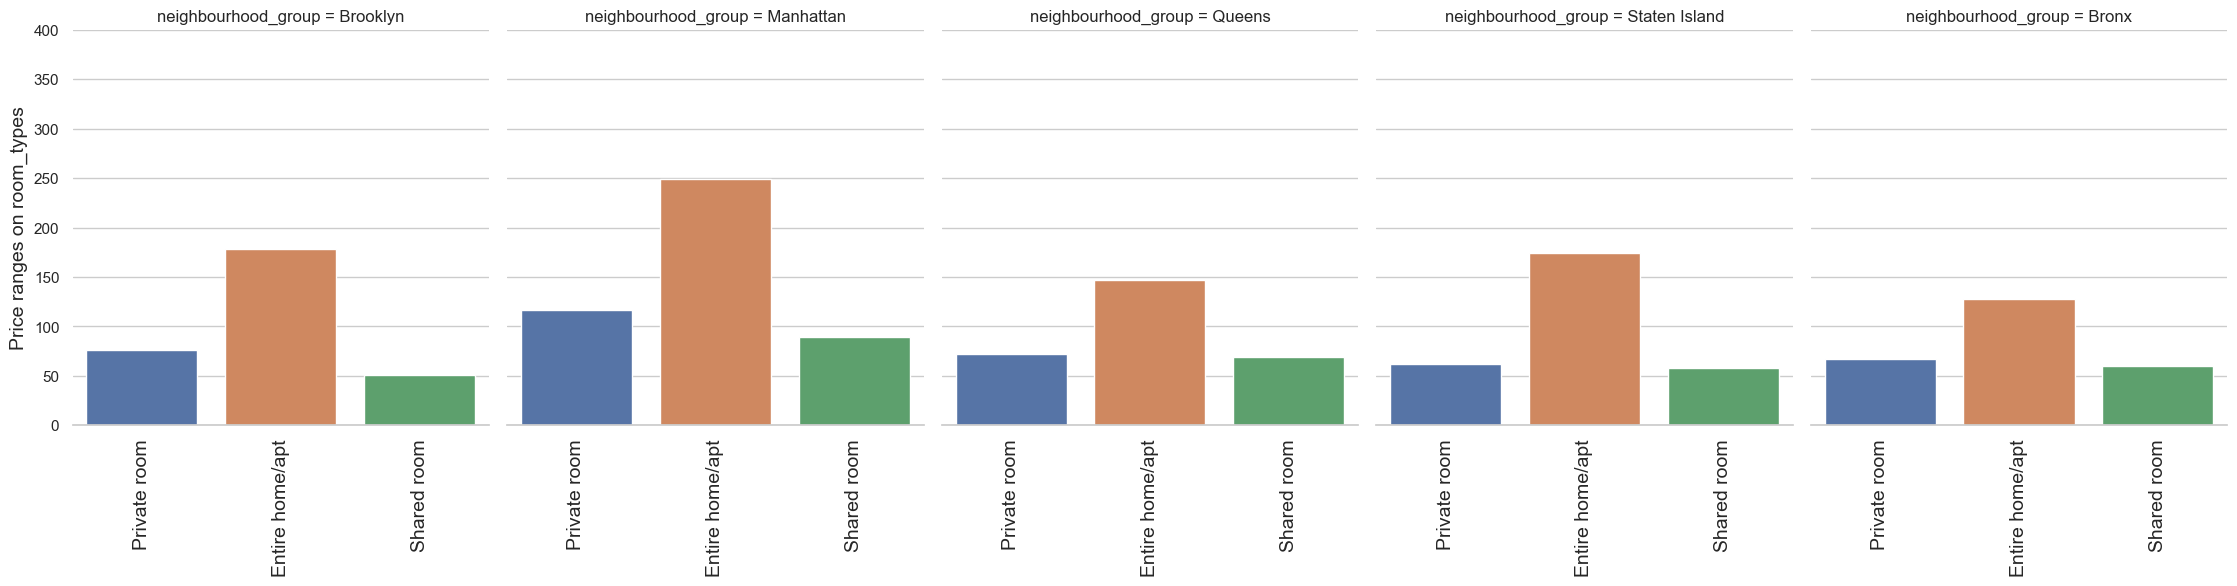

In [157]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types", fontsize=14)
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90, fontsize=14)
  .set(ylim=(0, 400))
  .despine(left=True)) 

<div class="alert alert-block alert-info">
<b>Inferences:</b> Looks like a property/listing with Entire home/apt as room_type wins the show at NYC followed by private rooms. Manhattan has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night.  And it's obvious being the most expensive place to live in! For each 'room_type' there are ~1.4 reviews per month on average.
</div>

### 8.7 'minimum_night_categories' vs 'reviews_per_month' 

In [158]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


In [159]:
df.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1227.57
Very High     2235.19
Medium        4689.73
Very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

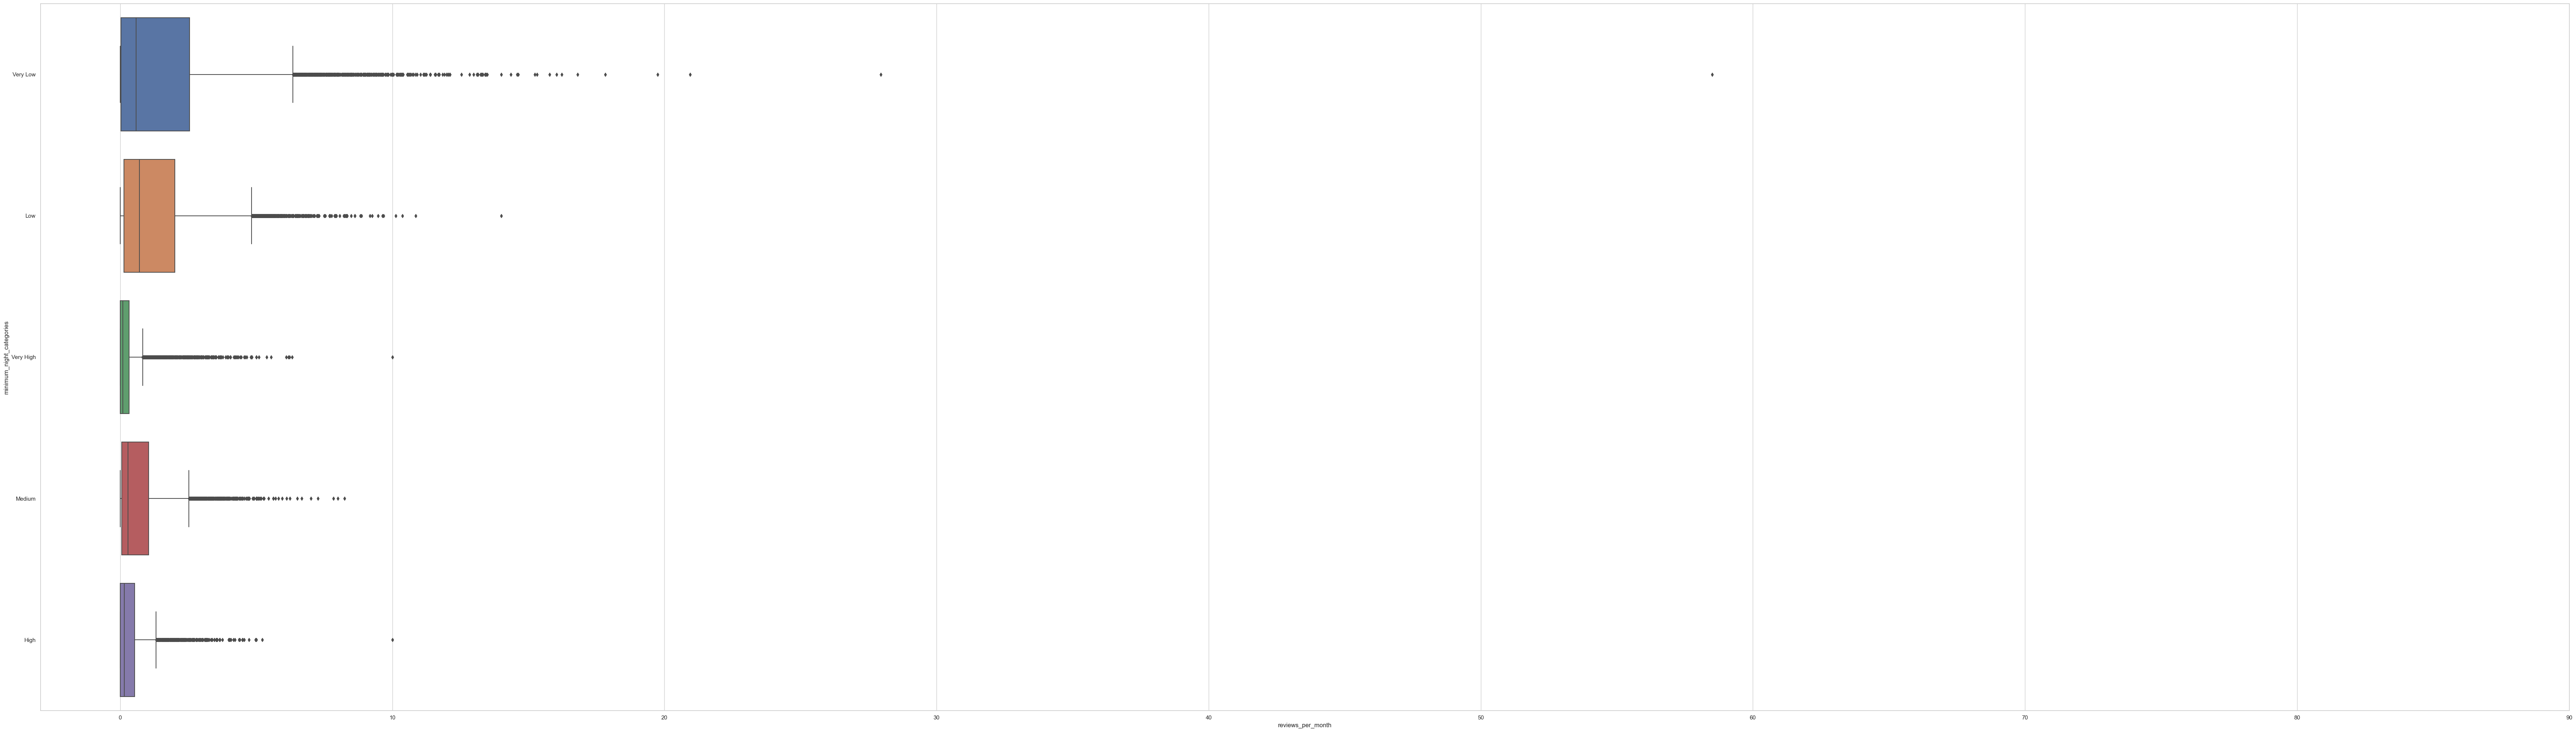

In [160]:
plt.figure(figsize=(70,20))
sns.boxplot(data = df, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,10))
plt.show()

<div class="alert alert-block alert-info">
<b>Inferences:</b> Customer's are more likely to leave reviews for low number of minimum nights.
</div>

<div class="alert alert-block alert-success">
<b>Quick Check:</b> What adjustments can be made in the existing properties to make it more customer-oriented?
    ---> The values in 'minimum_nights' column should be on the lower side to make the properties more customer-oriented.
</div>

### 8.8 'availability_365_categories', 'price_categories' vs 'reviews_per_month' 

In [161]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Very High,Very Low,Very Low,Very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Very High,Very Low,Very Low,Very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,Very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium,Very Low,Very Low,Very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Very Low,Very High,Medium,Medium


In [162]:
df.availability_365_categories.value_counts()

availability_365_categories
Very Low     17941
Low          11829
Very High     8108
Medium        5792
High          5225
Name: count, dtype: int64

In [163]:
pd.DataFrame(df.groupby(['availability_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_365_categories price_categories                   
High                        High                       0.413506
                            Low                        2.095180
                            Medium                     0.950500
                            Very High                  0.211905
                            Very Low                   2.986492
Low                         High                       0.407565
                            Low                        1.583401
                            Medium                     0.700449
                            Very High                  0.612381
                            Very Low                   2.515795
Medium                      High                       0.401201
                            Low                        1.797536
                            Medium                     0.971300
                            Very High                  0.188182
                            Very Low                   2.532178
Very High                   High                       0.225445
                            Low                        1.309856
                            Medium                     0.560150
                            Very High                  0.124103
                            Very Low                   1.801516
Very Low                    High                       0.205953
                            Low                        0.407902
                            Medium                     0.186864
                            Very High                  0.255312
                            Very Low                   0.439738

<div class="alert alert-block alert-info">
<b>Inferences:</b> If the combination of "availability" and "price" is very high, "reviews_per_month" will be low on average. Very high "availability" and very low "price" are likely to get more reviews.
</div>

<div class="alert alert-block alert-success">
<b>Summary:</b> Data has been explored using different variables. 'Price' column analysis is done and also checked with the most correlated variables by categorization. Have dealt with missing data and outliers, tested some of the fundamental statistical assumptions and even transformed categorial variables into dummy variables. 
</div>

<div class="alert alert-block alert-success">
<b>Conclusion:</b> As per the Analysis done above, we can conclude that it looks like "Bronx" and "Staten Island" has listings which are mostly available throughout the year, might be the case as they are not much costlier as compared to other boroughs as in "Manhanttan", "Brooklyn" and "Queens".
</div>